# Tarea 2- Statistical Learning-IIO

Héctor Alejandro Aragón Matute- 22001217

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Creando el conjunto de datos

In [98]:
dataHP=pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [99]:
dataHP.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Extraer columnas con NA

In [100]:
cols_con_na=[col for col in dataHP.columns if (dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [101]:
prop_nan_per_col=dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

Las columnas: con Na muy altos son eliminaddos, por considerarse Natural el NA: Alley- 0.937671, FireplaceQu- 0.472603,PoolQC- 0.995205,Fence-0.807534,MiscFeature-0.963014. En ese sentido se identifican caracteristicas que normalmente una Casa no poseeria como: Callejon, Chiminea, Piscina, y otros Miscelaneos.

In [102]:
prop_nan_per_col=dataHP[cols_con_na].mean()
prop_nan_per_col

C:\Users\halej\AppData\Local\Temp\ipykernel_17728\2184724564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  prop_nan_per_col=dataHP[cols_con_na].mean()


LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [103]:
prop_nan_per_col2=dataHP[cols_con_na].median()
prop_nan_per_col2

C:\Users\halej\AppData\Local\Temp\ipykernel_17728\1307326108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  prop_nan_per_col2=dataHP[cols_con_na].median()


LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1980.0
dtype: float64

Tipos de dato

In [104]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

## CCA

#### Revisión de tipos de datos FLOAT(Numericos)

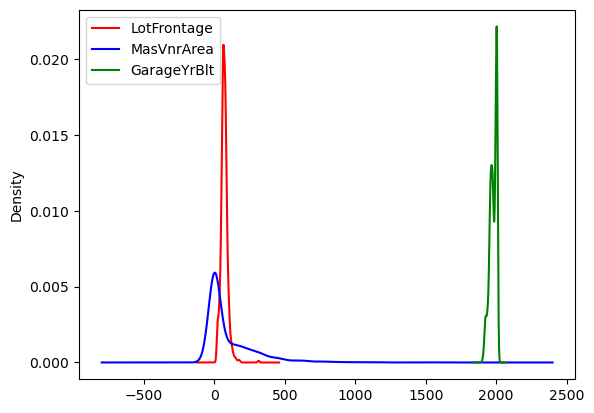

In [105]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['LotFrontage'].plot.density(color='red', label='LotFrontage')
dataHP['MasVnrArea'].plot.density(color='blue', label='MasVnrArea')
dataHP['GarageYrBlt'].plot.density(color='green', label='GarageYrBlt')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()


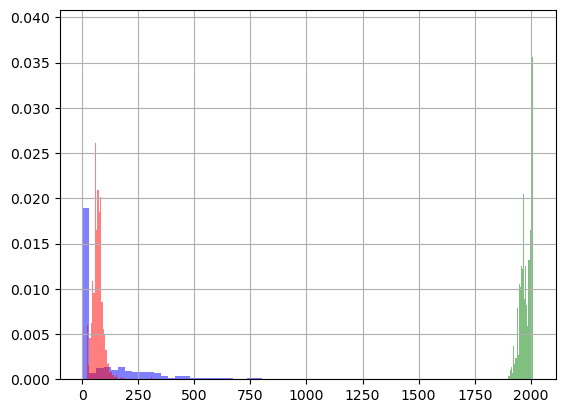

In [106]:
dataHP['MasVnrArea'].hist(bins=50, density=True, color='blue',alpha=0.5)
dataHP['LotFrontage'].hist(bins=50, density=True, color='red',alpha=0.5)
dataHP['GarageYrBlt'].hist(bins=50, density=True, color='green',alpha=0.5)
plt.show()

#### Desición de imputación 1- Para Variables FLOAT:

Luego de revisar las graficas, medias y medianas se considera que no se afectaria estadisticamente as variables si se las imputa con la Mediana

In [107]:
mediana1=dataHP['MasVnrArea'].median()
mediana2=dataHP['LotFrontage'].median()
mediana3=dataHP['GarageYrBlt'].median()

print(f"Mediana 1:{mediana1}")
print(f"Mediana 2:{mediana2}")
print(f"Mediana 3:{mediana3}")

Mediana 1:0.0
Mediana 2:69.0
Mediana 3:1980.0


Crear nuevas columnas con la media y la mediana de la edad

In [108]:
dataHP['MasVnrArea_median'] = np.round(dataHP['MasVnrArea'].fillna(mediana1))
dataHP['LotFrontage_median'] = np.round(dataHP['LotFrontage'].fillna(mediana2))
dataHP['GarageYrBlt_median'] = np.round(dataHP['GarageYrBlt'].fillna(mediana3))

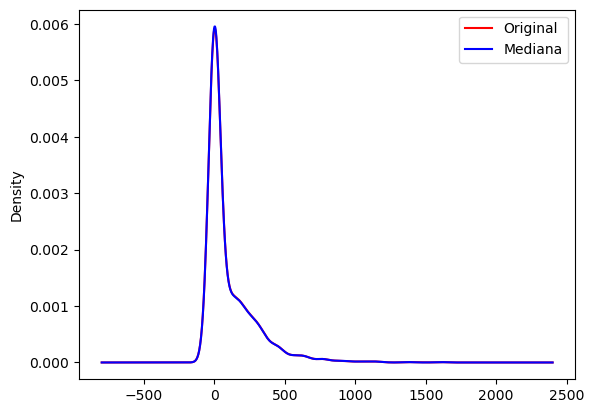

In [109]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['MasVnrArea'].plot.density(color='red', label='Original')
dataHP['MasVnrArea_median'].plot.density(color='blue', label='Mediana')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()

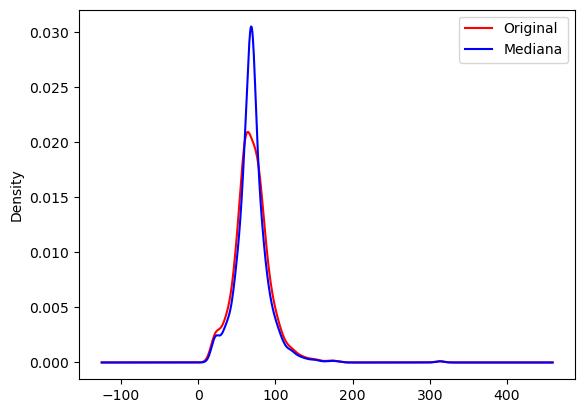

In [110]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['LotFrontage'].plot.density(color='red', label='Original')
dataHP['LotFrontage_median'].plot.density(color='blue', label='Mediana')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()

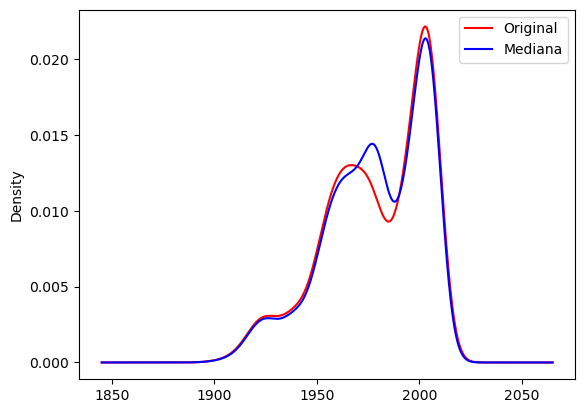

In [111]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['GarageYrBlt'].plot.density(color='red', label='Original')
dataHP['GarageYrBlt_median'].plot.density(color='blue', label='Mediana')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()

#### Revisión de tipos de datos Object

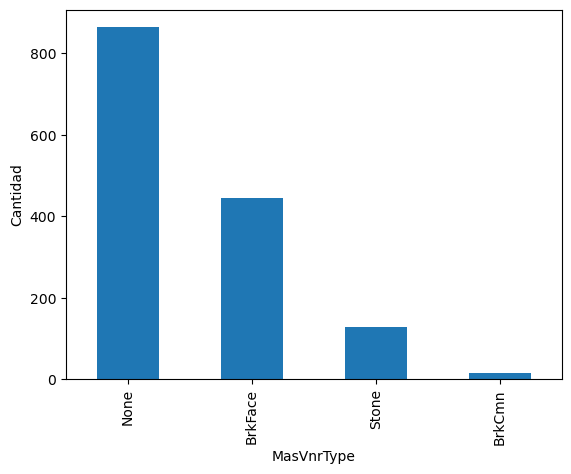

In [112]:
dataHP['MasVnrType'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("MasVnrType")
plt.show()

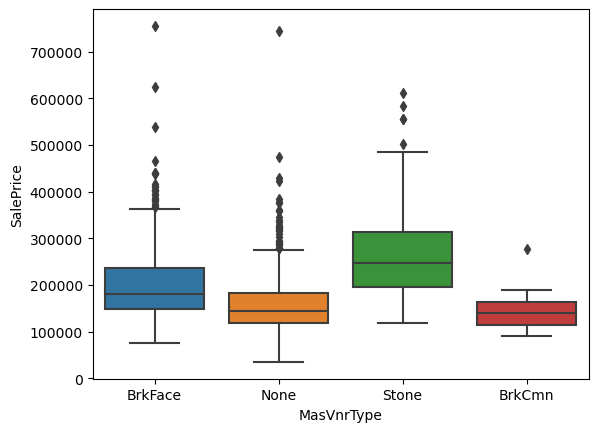

In [113]:
import seaborn as sns
sns.boxplot(x=dataHP['MasVnrType'], y=dataHP['SalePrice'])
plt.show()

Imputar con None

In [114]:
dataHP['MasVnrType'].fillna('None',inplace=True)

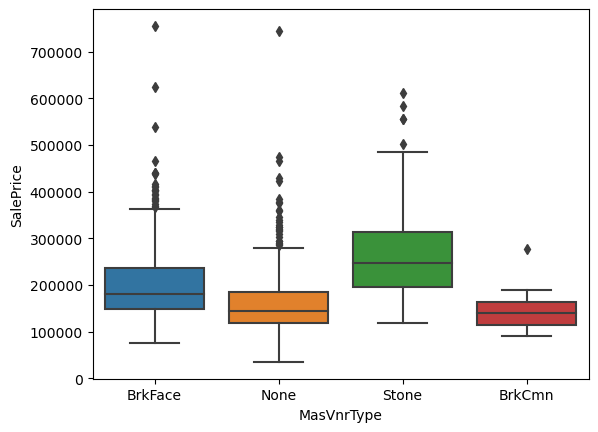

In [115]:
sns.boxplot(x=dataHP['MasVnrType'], y=dataHP['SalePrice'])
plt.show()

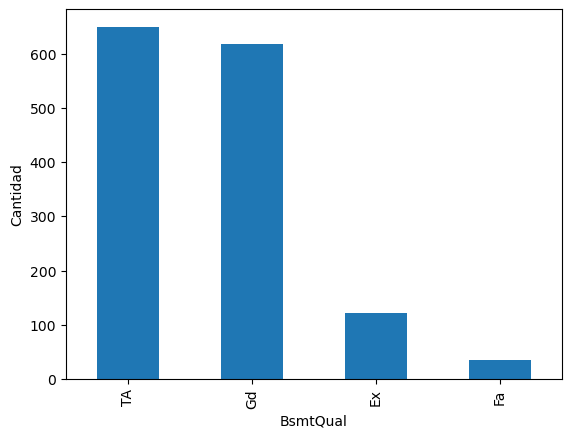

In [116]:
dataHP['BsmtQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

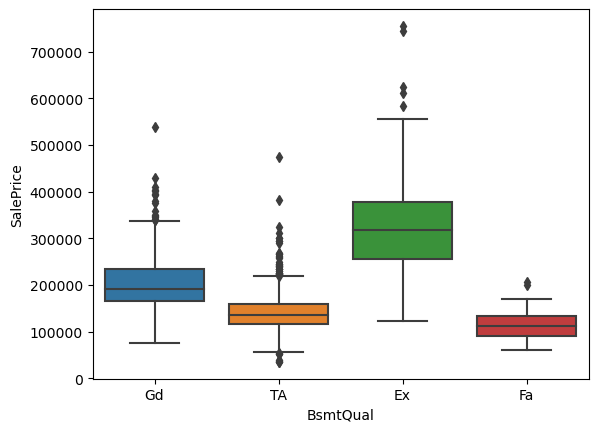

In [117]:
sns.boxplot(x=dataHP['BsmtQual'], y=dataHP['SalePrice'])
plt.show()

Imputar con TA

In [118]:
dataHP['BsmtQual'].fillna('TA',inplace=True)

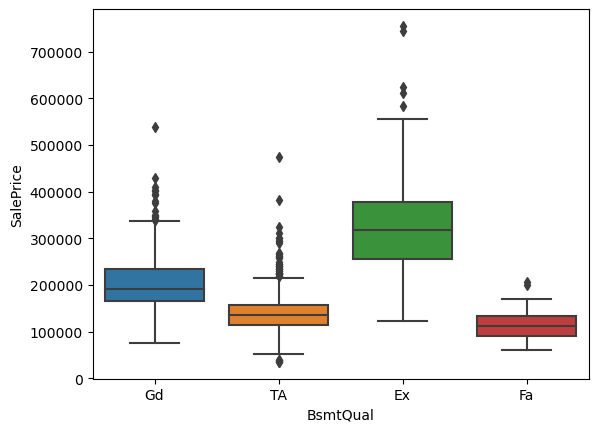

In [119]:
sns.boxplot(x=dataHP['BsmtQual'], y=dataHP['SalePrice'])
plt.show()

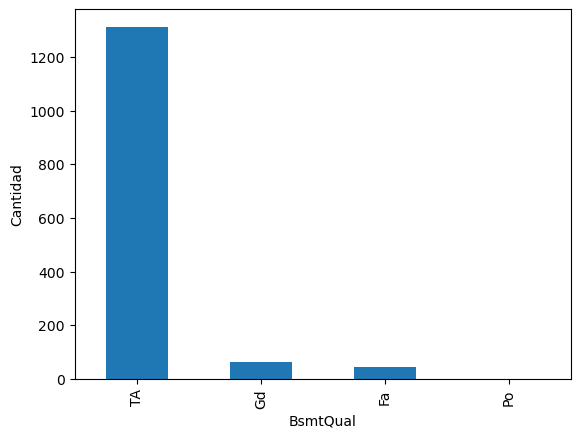

In [120]:
dataHP['BsmtCond'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

Imputar con TA

In [121]:
dataHP['BsmtCond'].fillna('TA',inplace=True)

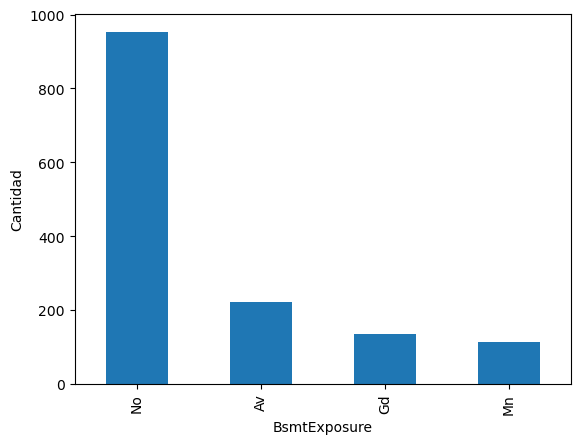

In [122]:
dataHP['BsmtExposure'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtExposure")
plt.show()

Imputar con NO

In [123]:
dataHP['BsmtExposure'].fillna('No',inplace=True)

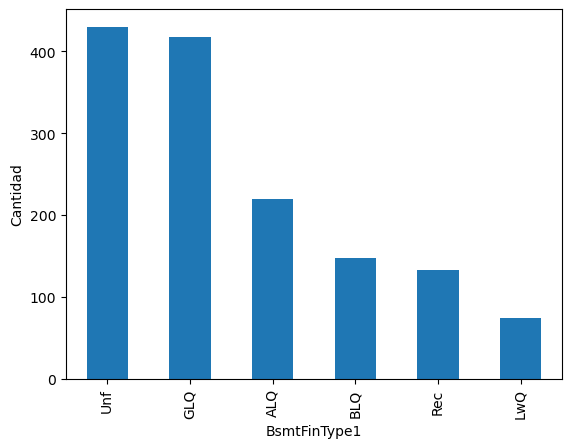

In [124]:
dataHP['BsmtFinType1'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtFinType1")
plt.show()

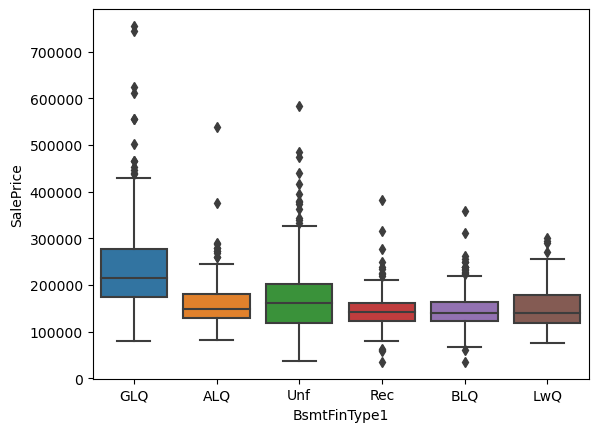

In [125]:
sns.boxplot(x=dataHP['BsmtFinType1'], y=dataHP['SalePrice'])
plt.show()

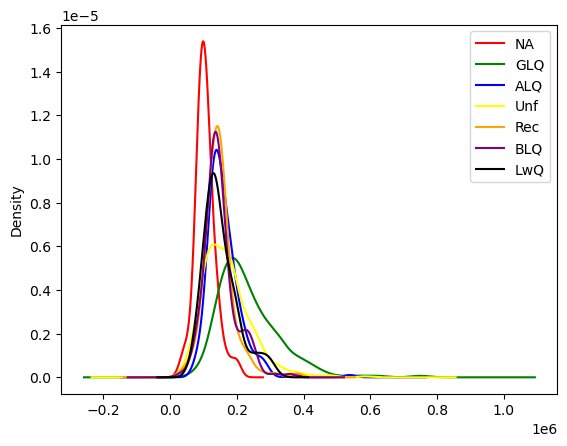

In [126]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="NA")
dataHP[dataHP['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="Green", label="GLQ")
dataHP[dataHP['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataHP[dataHP['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataHP[dataHP['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="orange", label="Rec")
dataHP[dataHP['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataHP[dataHP['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="black", label="LwQ")
ax.legend()

plt.show()

Imputar con BLQ

In [127]:
dataHP['BsmtFinType1'].fillna('BLQ',inplace=True)

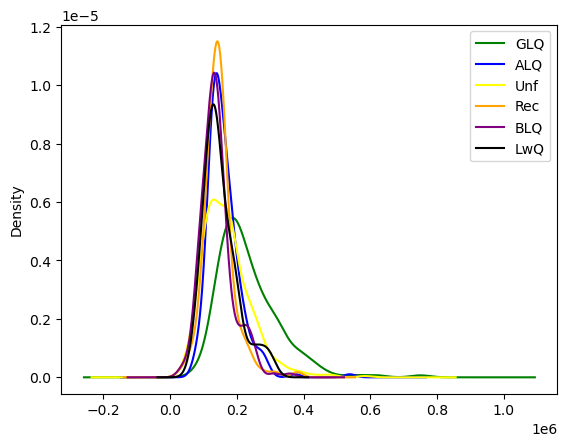

In [128]:
fig = plt.figure()

ax = fig.add_subplot(111)


dataHP[dataHP['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="Green", label="GLQ")
dataHP[dataHP['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataHP[dataHP['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataHP[dataHP['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="orange", label="Rec")
dataHP[dataHP['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataHP[dataHP['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="black", label="LwQ")
ax.legend()

plt.show()

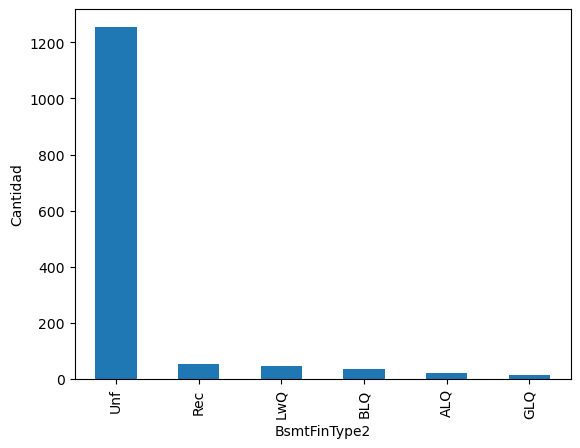

In [129]:
dataHP['BsmtFinType2'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtFinType2")
plt.show()

Imputar con UNF

In [130]:
dataHP['BsmtFinType2'].fillna('UNF',inplace=True)

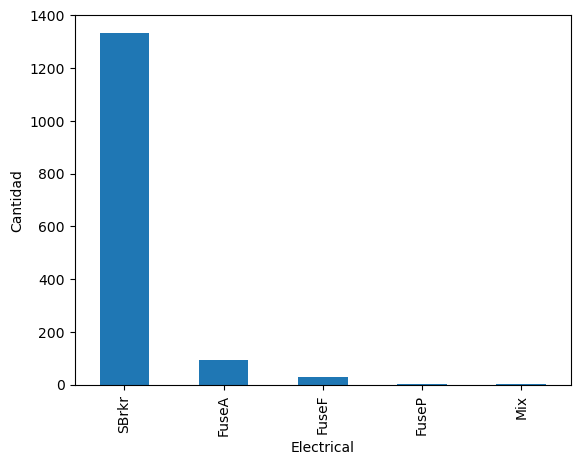

In [131]:
dataHP['Electrical'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("Electrical")
plt.show()

Imputar con SBRKR

In [132]:
dataHP['Electrical'].fillna('UNF',inplace=True)

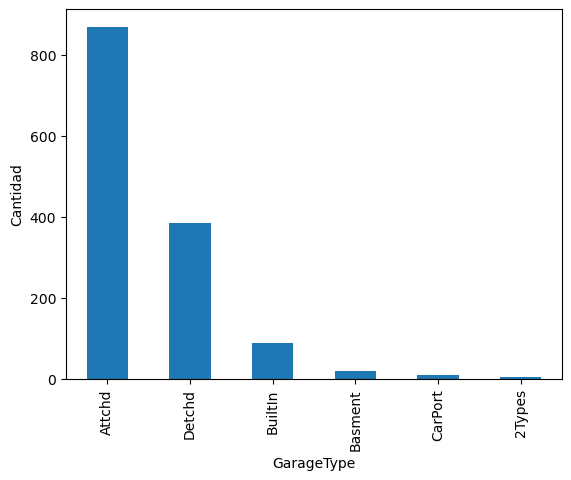

In [133]:
dataHP['GarageType'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageType")
plt.show()

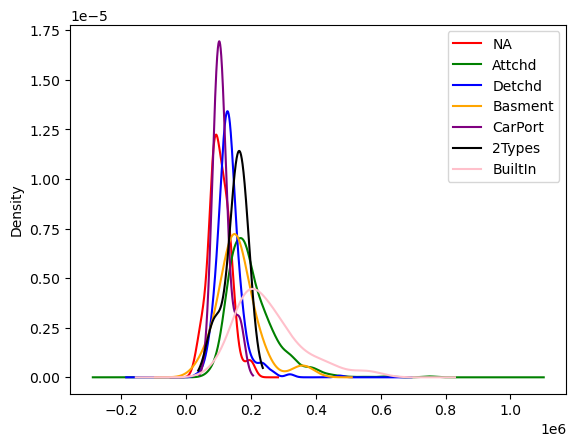

In [134]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['GarageType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="NA")
dataHP[dataHP['GarageType'] == 'Attchd']['SalePrice'].plot(kind="kde", color="Green", label="Attchd")
dataHP[dataHP['GarageType'] == 'Detchd']['SalePrice'].plot(kind="kde", color="blue", label="Detchd")
dataHP[dataHP['GarageType'] == 'Basment']['SalePrice'].plot(kind="kde", color="orange", label="Basment")
dataHP[dataHP['GarageType'] == 'CarPort']['SalePrice'].plot(kind="kde", color="purple", label="CarPort")
dataHP[dataHP['GarageType'] == '2Types']['SalePrice'].plot(kind="kde", color="black", label="2Types")
dataHP[dataHP['GarageType'] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="pink", label="BuiltIn")

ax.legend()

plt.show()

Imputar con CARPORT

In [135]:
dataHP['GarageType'].fillna('CarPort',inplace=True)

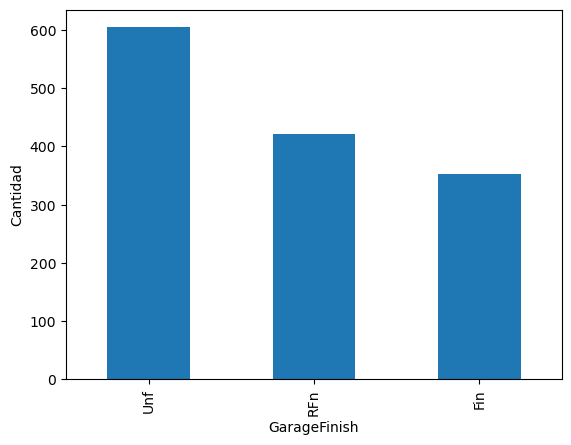

In [136]:
dataHP['GarageFinish'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageFinish")
plt.show()

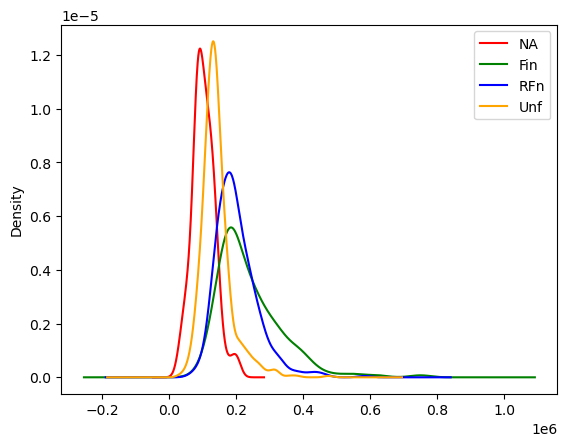

In [137]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['GarageFinish'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="NA")
dataHP[dataHP['GarageFinish'] == 'Fin']['SalePrice'].plot(kind="kde", color="Green", label="Fin")
dataHP[dataHP['GarageFinish'] == 'RFn']['SalePrice'].plot(kind="kde", color="blue", label="RFn")
dataHP[dataHP['GarageFinish'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")


ax.legend()

plt.show()

Imputar UNF

In [138]:
dataHP['GarageFinish'].fillna('Unf',inplace=True)

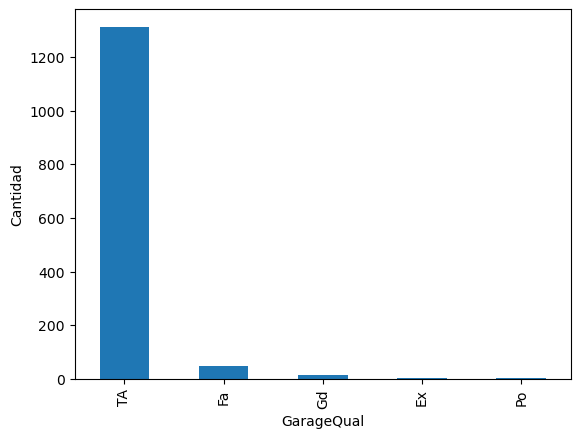

In [139]:
dataHP['GarageQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageQual")
plt.show()

Imputar TA

In [140]:
dataHP['GarageQual'].fillna('TA',inplace=True)

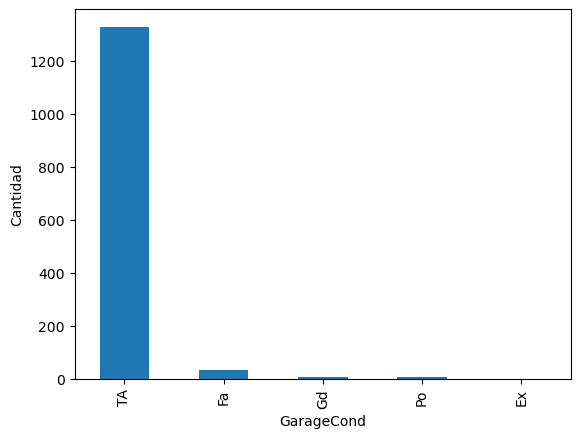

In [141]:
dataHP['GarageCond'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageCond")
plt.show()

Imputar TA

In [142]:
dataHP['GarageCond'].fillna('TA',inplace=True)

## Codificación de Variables

Crear diccionarios de conteo de valores

In [143]:
MasVnrType_freq_maper=(dataHP['MasVnrType'].value_counts().sort_values(ascending=False)).to_dict()
MasVnrType_freq_maper

{'None': 872, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15}

In [144]:
BsmtQual_freq_maper=(dataHP['BsmtQual'].value_counts().sort_values(ascending=False)).to_dict()
BsmtQual_freq_maper

{'TA': 686, 'Gd': 618, 'Ex': 121, 'Fa': 35}

In [145]:
BsmtCond_freq_maper=(dataHP['BsmtCond'].value_counts().sort_values(ascending=False)).to_dict()
BsmtCond_freq_maper

{'TA': 1348, 'Gd': 65, 'Fa': 45, 'Po': 2}

In [146]:
BsmtExposure_freq_maper=(dataHP['BsmtExposure'].value_counts().sort_values(ascending=False)).to_dict()
BsmtExposure_freq_maper

{'No': 991, 'Av': 221, 'Gd': 134, 'Mn': 114}

In [147]:
BsmtFinType1_freq_maper=(dataHP['BsmtFinType1'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType1_freq_maper

{'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 185, 'Rec': 133, 'LwQ': 74}

In [148]:
BsmtFinType2_freq_maper=(dataHP['BsmtFinType2'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType2_freq_maper

{'Unf': 1256, 'Rec': 54, 'LwQ': 46, 'UNF': 38, 'BLQ': 33, 'ALQ': 19, 'GLQ': 14}

In [149]:
Electrical_freq_maper=(dataHP['Electrical'].value_counts().sort_values(ascending=False)).to_dict()
Electrical_freq_maper

{'SBrkr': 1334, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1, 'UNF': 1}

In [150]:
GarageType_freq_maper=(dataHP['GarageType'].value_counts().sort_values(ascending=False)).to_dict()
GarageType_freq_maper

{'Attchd': 870,
 'Detchd': 387,
 'CarPort': 90,
 'BuiltIn': 88,
 'Basment': 19,
 '2Types': 6}

In [151]:
GarageFinish_freq_maper=(dataHP['GarageFinish'].value_counts().sort_values(ascending=False)).to_dict()
GarageFinish_freq_maper

{'Unf': 686, 'RFn': 422, 'Fin': 352}

In [152]:
GarageQual_freq_maper=(dataHP['GarageQual'].value_counts().sort_values(ascending=False)).to_dict()
GarageQual_freq_maper

{'TA': 1392, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3}

In [153]:
GarageCond_freq_maper=(dataHP['GarageCond'].value_counts().sort_values(ascending=False)).to_dict()
GarageCond_freq_maper

{'TA': 1407, 'Fa': 35, 'Gd': 9, 'Po': 7, 'Ex': 2}

In [154]:
dataHP['MasVnrType_Code']=dataHP['MasVnrType'].map(MasVnrType_freq_maper)
dataHP[['MasVnrType','MasVnrType_Code']]

MasVnrType  MasVnrType_Code
0       BrkFace              445
1          None              872
2       BrkFace              445
3          None              872
4       BrkFace              445
...         ...              ...
1455       None              872
1456      Stone              128
1457       None              872
1458       None              872
1459       None              872

[1460 rows x 2 columns]

In [155]:
dataHP['BsmtQual_Code']=dataHP['BsmtQual'].map(BsmtQual_freq_maper)
dataHP[['BsmtQual','BsmtQual_Code']]

BsmtQual  BsmtQual_Code
0          Gd            618
1          Gd            618
2          Gd            618
3          TA            686
4          Gd            618
...       ...            ...
1455       Gd            618
1456       Gd            618
1457       TA            686
1458       TA            686
1459       TA            686

[1460 rows x 2 columns]

In [156]:
dataHP['BsmtCond_Code']=dataHP['BsmtCond'].map(BsmtCond_freq_maper)
dataHP[['BsmtCond','BsmtCond_Code']]

BsmtCond  BsmtCond_Code
0          TA           1348
1          TA           1348
2          TA           1348
3          Gd             65
4          TA           1348
...       ...            ...
1455       TA           1348
1456       TA           1348
1457       Gd             65
1458       TA           1348
1459       TA           1348

[1460 rows x 2 columns]

In [157]:
dataHP['BsmtExposure_Code']=dataHP['BsmtExposure'].map(BsmtExposure_freq_maper)
dataHP[['BsmtExposure','BsmtExposure_Code']]

BsmtExposure  BsmtExposure_Code
0              No                991
1              Gd                134
2              Mn                114
3              No                991
4              Av                221
...           ...                ...
1455           No                991
1456           No                991
1457           No                991
1458           Mn                114
1459           No                991

[1460 rows x 2 columns]

In [158]:
dataHP['BsmtFinType1_Code']=dataHP['BsmtFinType1'].map(BsmtFinType1_freq_maper)
dataHP[['BsmtFinType1','BsmtFinType1_Code']]

BsmtFinType1  BsmtFinType1_Code
0             GLQ                418
1             ALQ                220
2             GLQ                418
3             ALQ                220
4             GLQ                418
...           ...                ...
1455          Unf                430
1456          ALQ                220
1457          GLQ                418
1458          GLQ                418
1459          BLQ                185

[1460 rows x 2 columns]

In [159]:
dataHP['BsmtFinType2_Code']=dataHP['BsmtFinType2'].map(BsmtFinType2_freq_maper)
dataHP[['BsmtFinType2','BsmtFinType2_Code']]

BsmtFinType2  BsmtFinType2_Code
0             Unf               1256
1             Unf               1256
2             Unf               1256
3             Unf               1256
4             Unf               1256
...           ...                ...
1455          Unf               1256
1456          Rec                 54
1457          Unf               1256
1458          Rec                 54
1459          LwQ                 46

[1460 rows x 2 columns]

In [160]:
dataHP['Electrical_Code']=dataHP['Electrical'].map(BsmtFinType2_freq_maper)
dataHP[['Electrical','Electrical_Code']]

Electrical  Electrical_Code
0         SBrkr              NaN
1         SBrkr              NaN
2         SBrkr              NaN
3         SBrkr              NaN
4         SBrkr              NaN
...         ...              ...
1455      SBrkr              NaN
1456      SBrkr              NaN
1457      SBrkr              NaN
1458      FuseA              NaN
1459      SBrkr              NaN

[1460 rows x 2 columns]

In [161]:
dataHP['GarageType_Code']=dataHP['GarageType'].map(GarageType_freq_maper)
dataHP[['GarageType','GarageType_Code']]

GarageType  GarageType_Code
0        Attchd              870
1        Attchd              870
2        Attchd              870
3        Detchd              387
4        Attchd              870
...         ...              ...
1455     Attchd              870
1456     Attchd              870
1457     Attchd              870
1458     Attchd              870
1459     Attchd              870

[1460 rows x 2 columns]

In [162]:
dataHP['GarageFinish_Code']=dataHP['GarageFinish'].map(GarageFinish_freq_maper)
dataHP[['GarageFinish','GarageFinish_Code']]

GarageFinish  GarageFinish_Code
0             RFn                422
1             RFn                422
2             RFn                422
3             Unf                686
4             RFn                422
...           ...                ...
1455          RFn                422
1456          Unf                686
1457          RFn                422
1458          Unf                686
1459          Fin                352

[1460 rows x 2 columns]

In [163]:
dataHP['GarageQual_Code']=dataHP['GarageQual'].map(GarageQual_freq_maper)
dataHP[['GarageQual','GarageQual_Code']]

GarageQual  GarageQual_Code
0            TA             1392
1            TA             1392
2            TA             1392
3            TA             1392
4            TA             1392
...         ...              ...
1455         TA             1392
1456         TA             1392
1457         TA             1392
1458         TA             1392
1459         TA             1392

[1460 rows x 2 columns]

In [164]:
dataHP['GarageCond_Code']=dataHP['GarageCond'].map(GarageCond_freq_maper)
dataHP[['GarageCond','GarageCond_Code']]

GarageCond  GarageCond_Code
0            TA             1407
1            TA             1407
2            TA             1407
3            TA             1407
4            TA             1407
...         ...              ...
1455         TA             1407
1456         TA             1407
1457         TA             1407
1458         TA             1407
1459         TA             1407

[1460 rows x 2 columns]

### Outliers

In [165]:
dataset=dataHP

def getColumnTypes(dataset):
      
    Continuas=[]
    Discretas=[]
    Categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                  Continuas.append(col)
            else:
                  Discretas.append(col)
        else:
             Categoricas.append(col)
    return Continuas,Discretas,Categoricas   


In [166]:
Continuas, Discretas, Categoricas = getColumnTypes(dataHP)
print (Continuas)
print (Discretas)
print (Categoricas)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'MasVnrArea_median', 'LotFrontage_median', 'GarageYrBlt_median']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MasVnrType_Code', 'BsmtQual_Code', 'BsmtCond_Code', 'BsmtExposure_Code', 'BsmtFinType1_Code', 'BsmtFinType2_Code', 'Electrical_Code', 'GarageType_Code', 'GarageFinish_Code', 'GarageQual_Code', 'GarageCond_Code']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterio

In [167]:
import scipy.stats as stats

In [168]:
'''Descrpcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers
Input:dataset -> pantas dataframe, col ->string con nombre de columna
output:dataset -> visualización de plots'''


def plotDistBoxQQ(dataset,col):
    plt.figure(figsize=(15,6))
    print(f"--------------------------------------{col}----------------------------")



    plt.subplot(1,3,1)
    sns.distplot(dataset['LotArea'],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")


--------------------------------------Id----------------------------
--------------------------------------LotFrontage----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------LotArea----------------------------
--------------------------------------YearBuilt----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------YearRemodAdd----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------MasVnrArea----------------------------
--------------------------------------BsmtFinSF1----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------BsmtFinSF2----------------------------
--------------------------------------BsmtUnfSF----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

--------------------------------------TotalBsmtSF----------------------------
--------------------------------------1stFlrSF----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------2ndFlrSF----------------------------
--------------------------------------GrLivArea----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------GarageYrBlt----------------------------
--------------------------------------GarageArea----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------WoodDeckSF----------------------------
--------------------------------------OpenPorchSF----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------EnclosedPorch----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------ScreenPorch----------------------------
--------------------------------------SalePrice----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------MasVnrArea_median----------------------------
--------------------------------------LotFrontage_median----------------------------


C:\Users\halej\AppData\Local\Temp\ipykernel_17728\551063573.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,6))
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

--------------------------------------GarageYrBlt_median----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


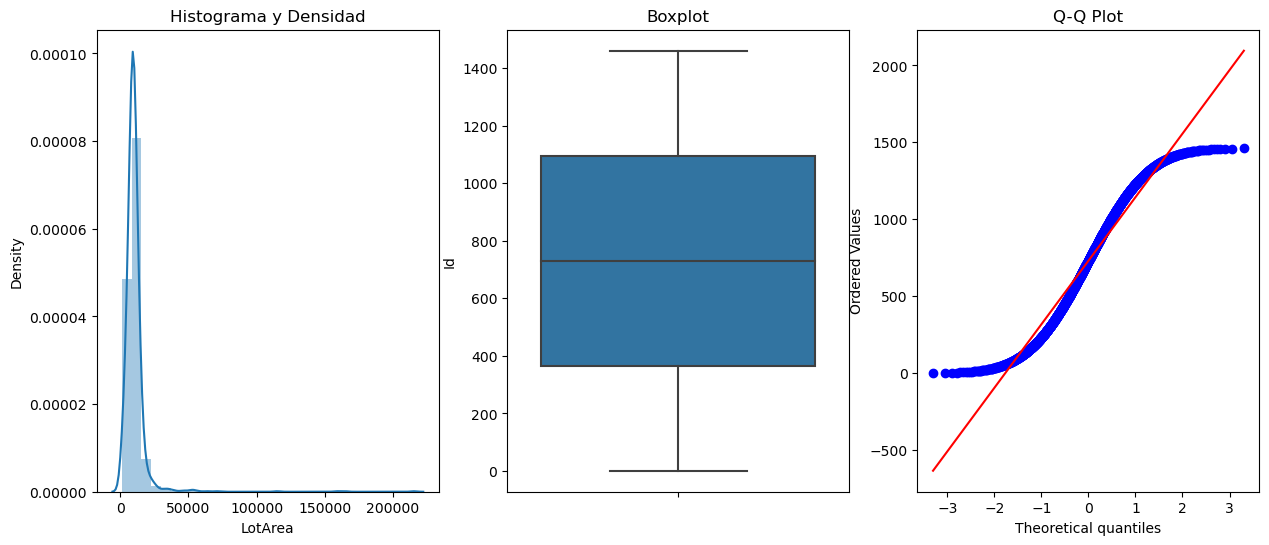

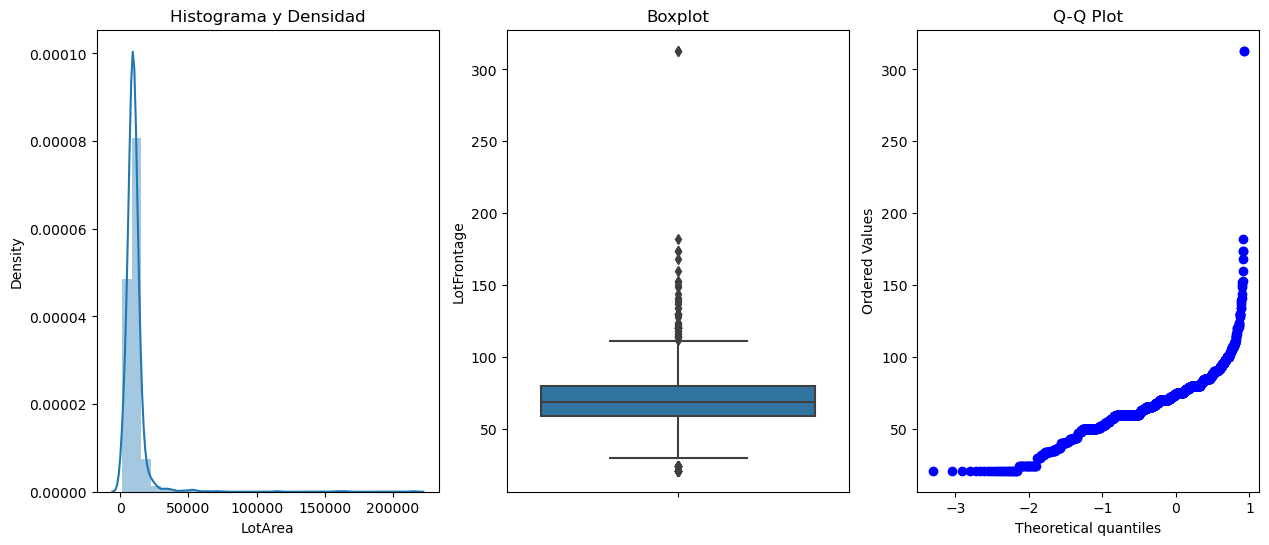

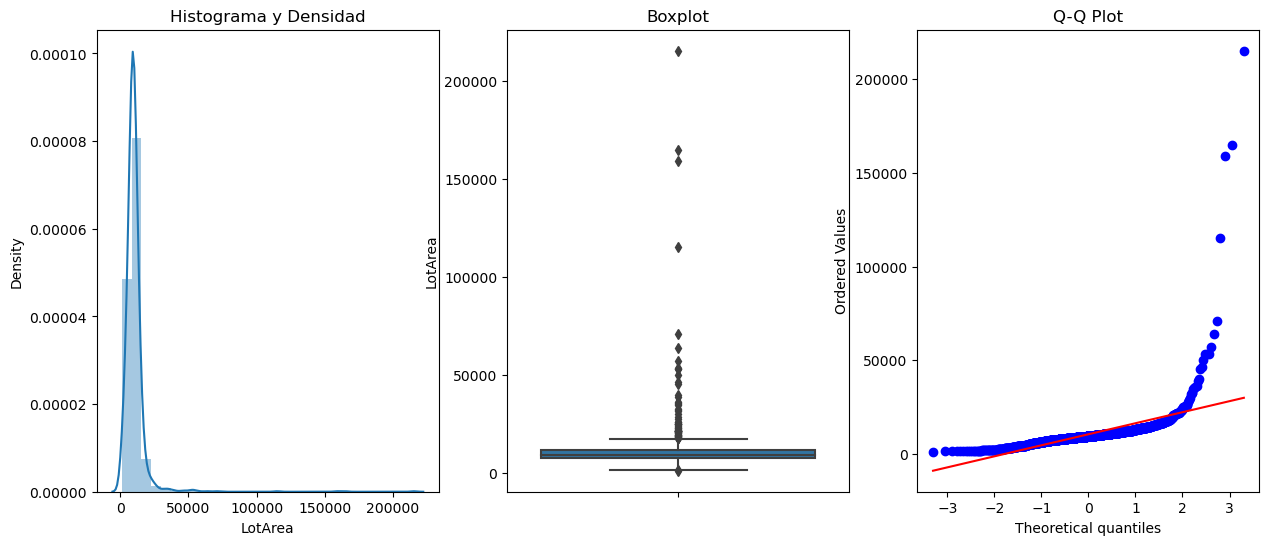

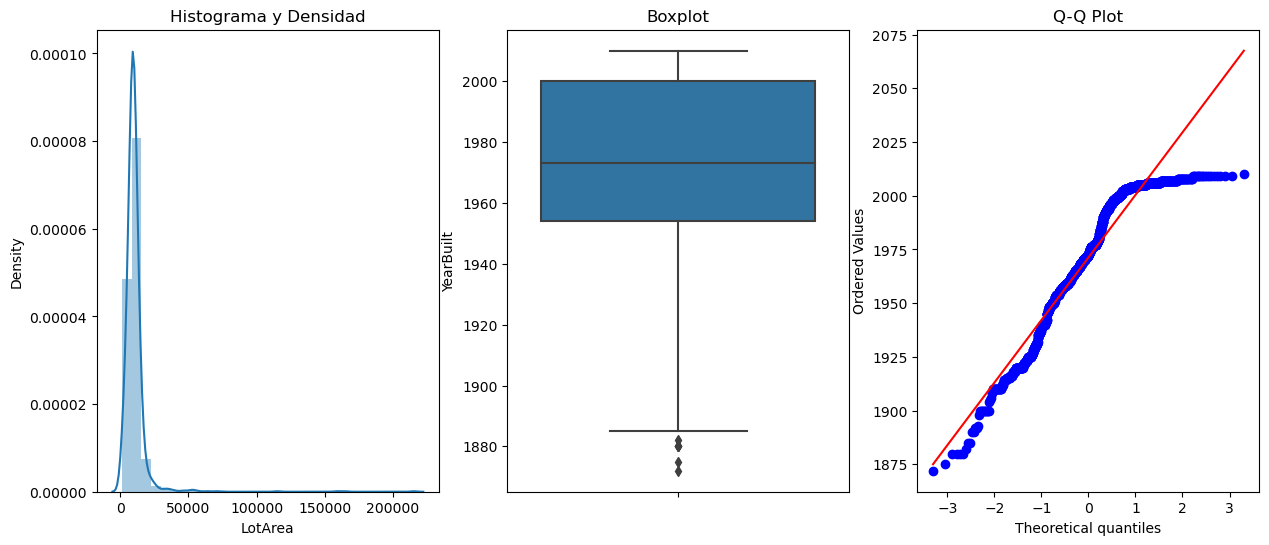

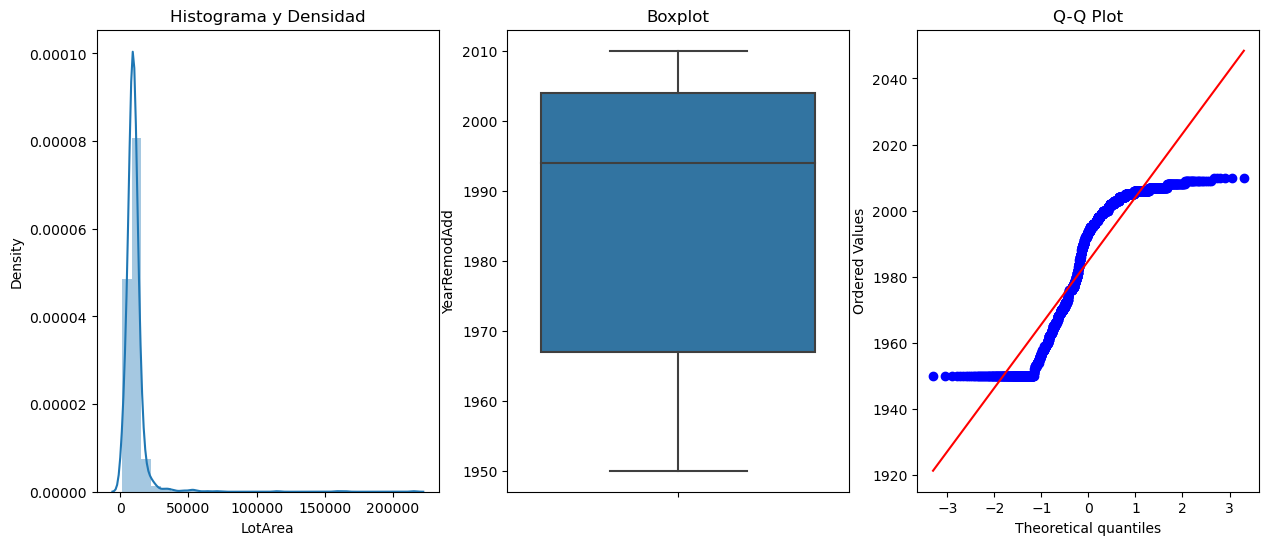

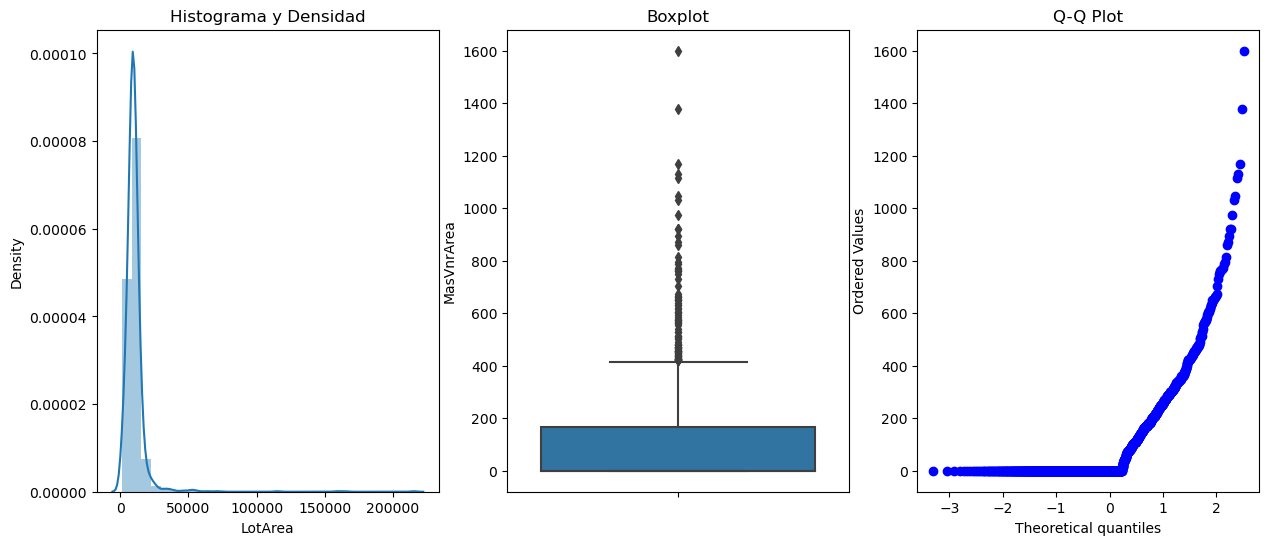

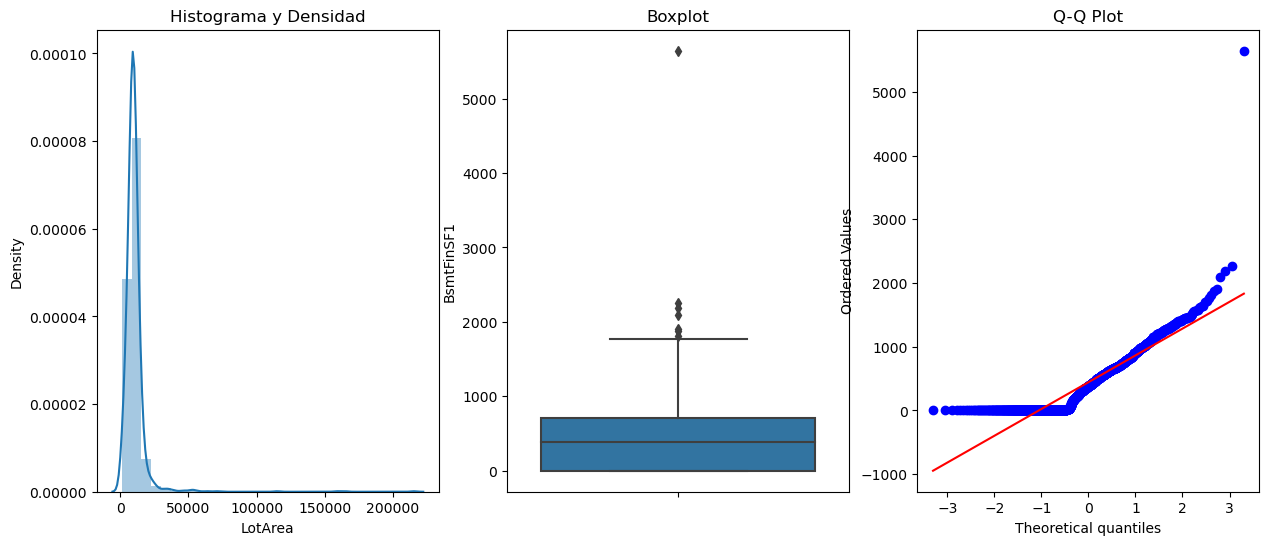

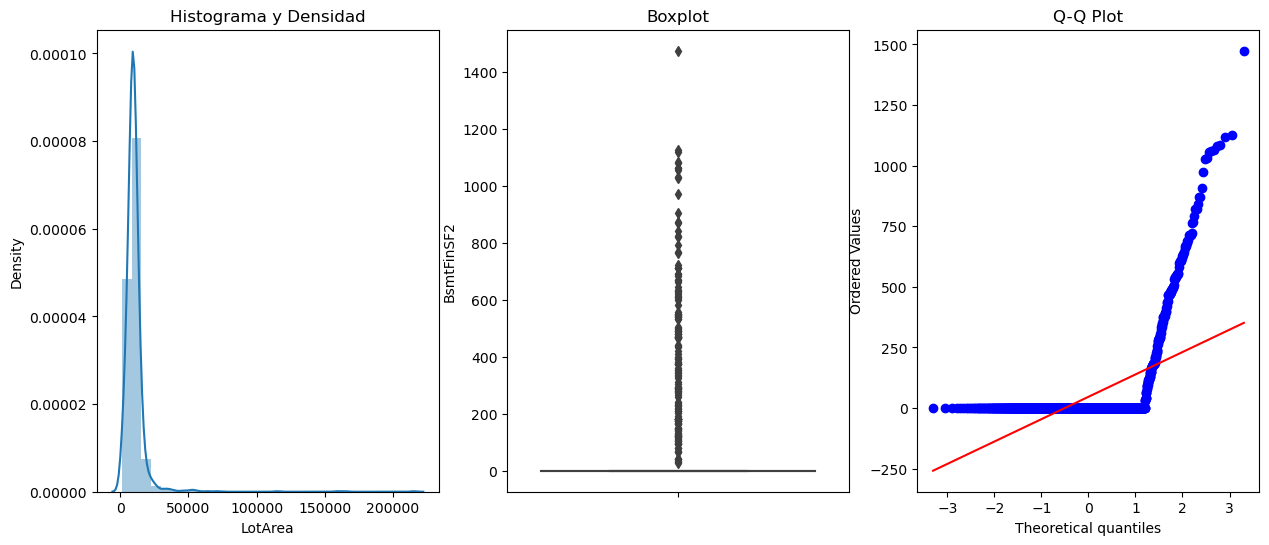

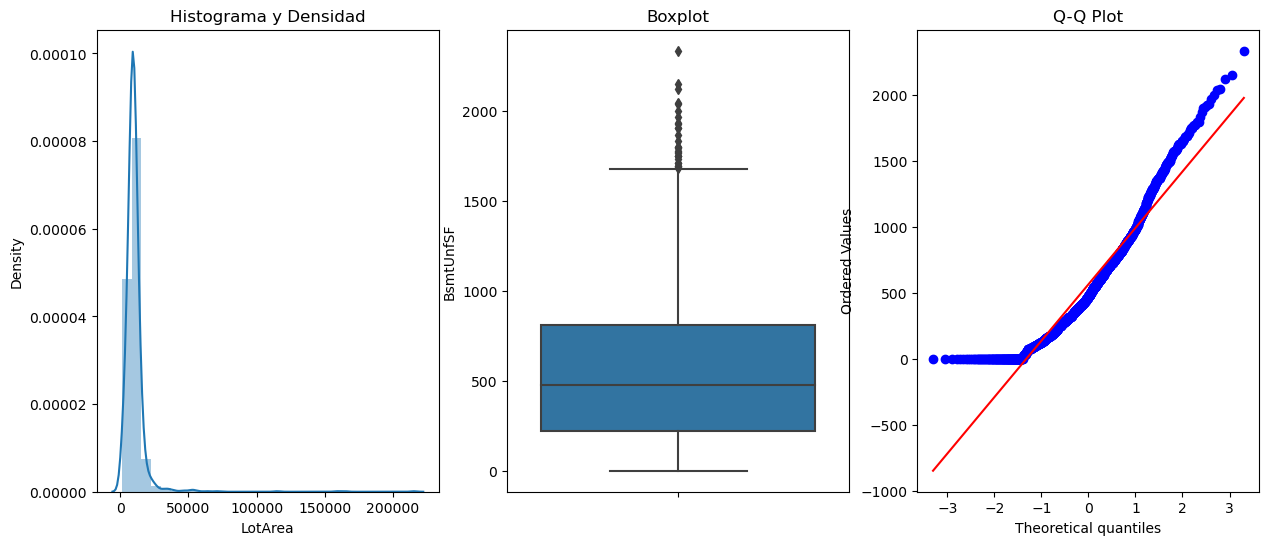

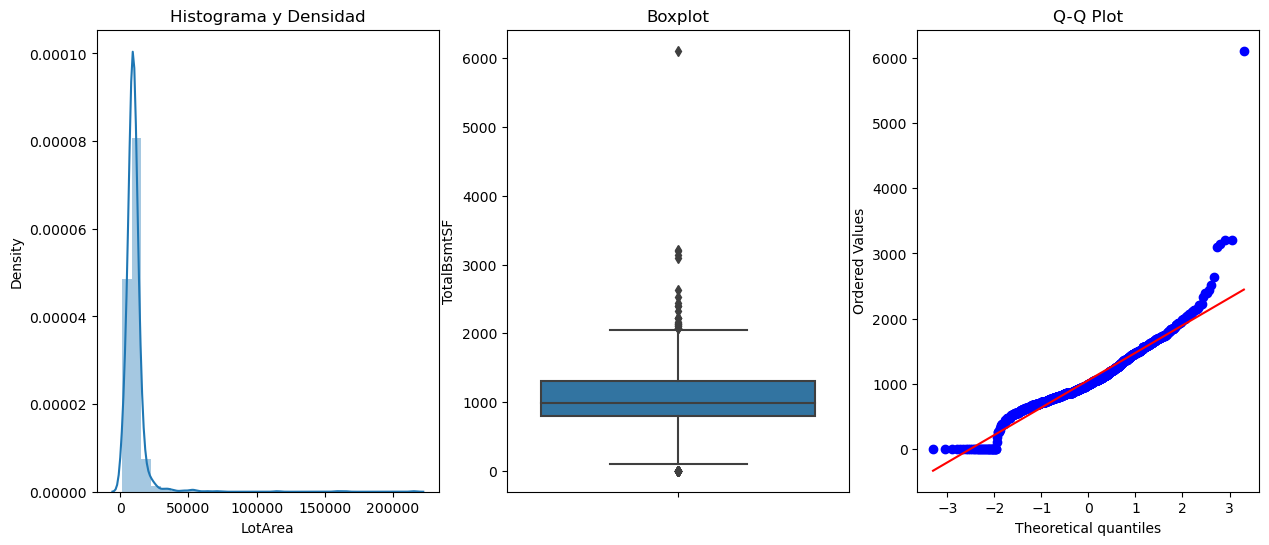

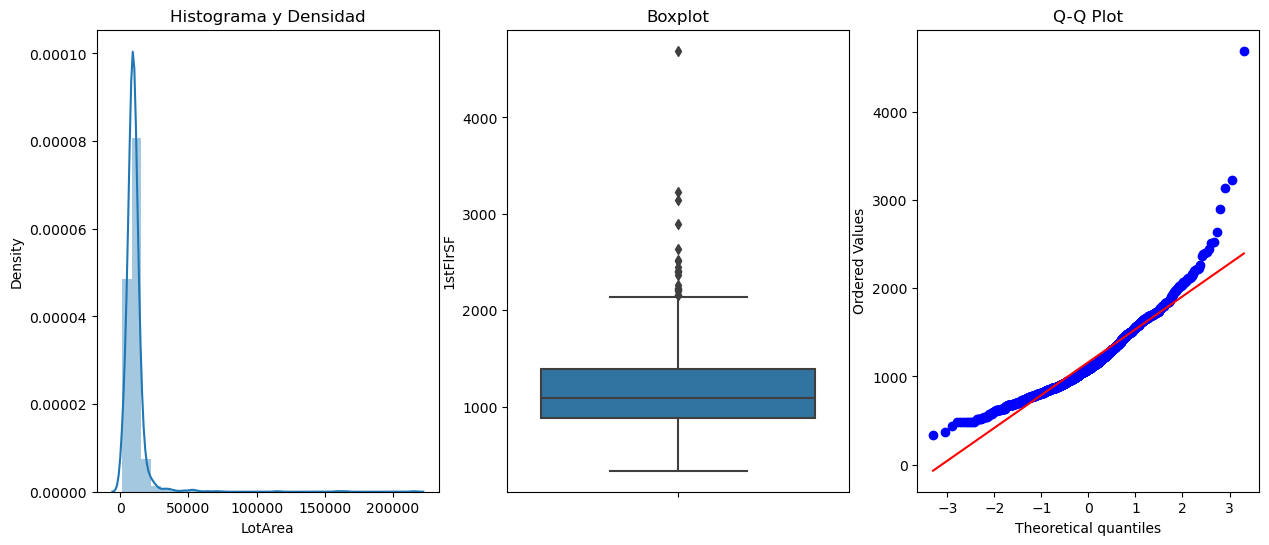

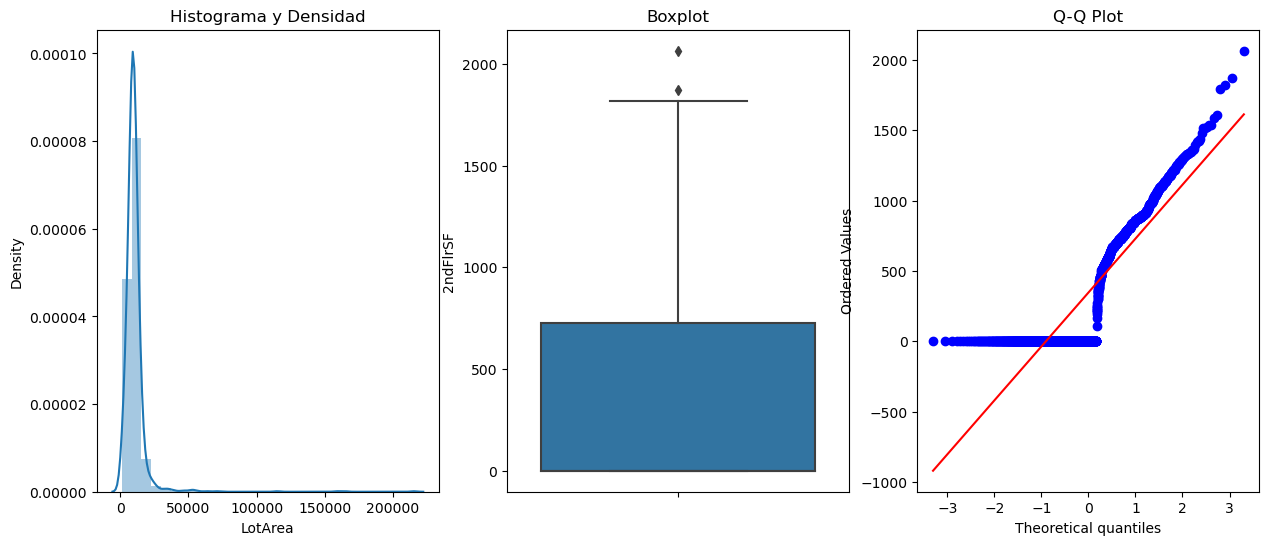

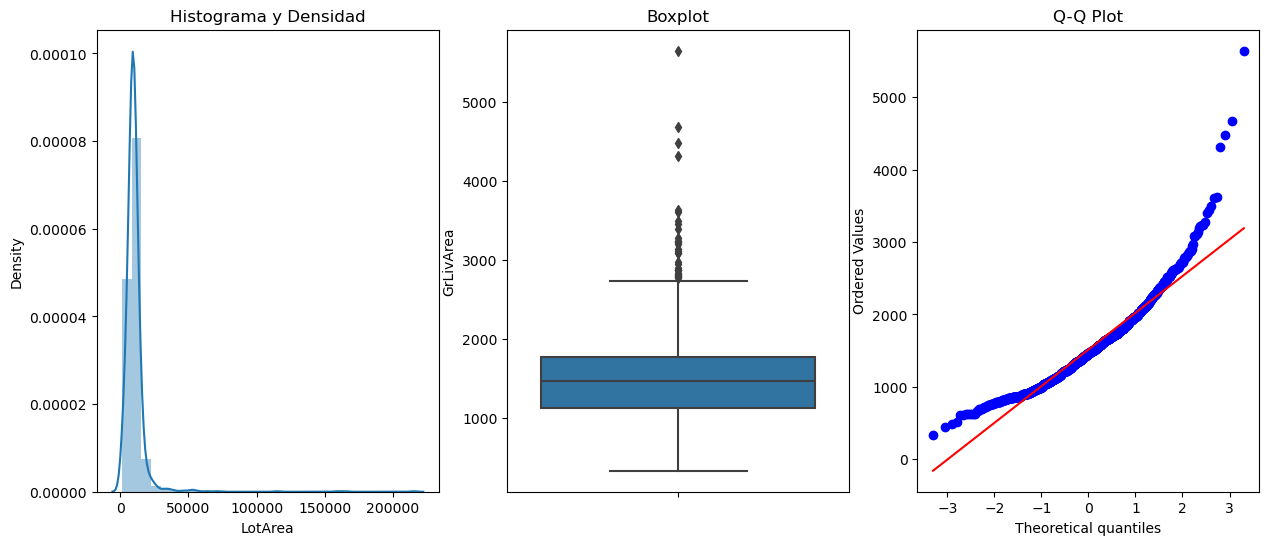

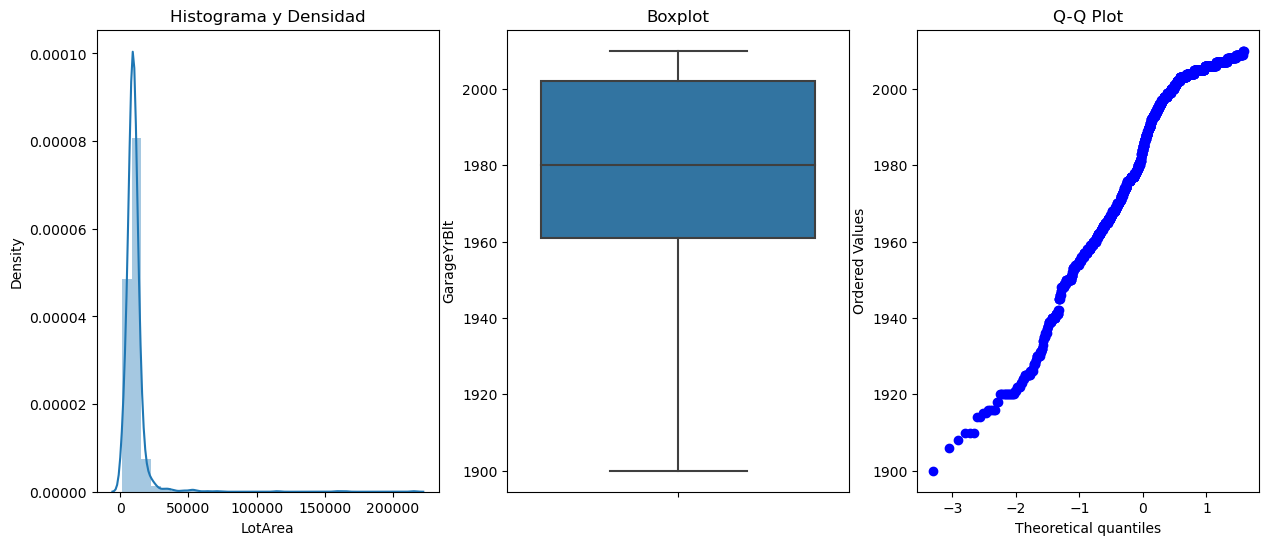

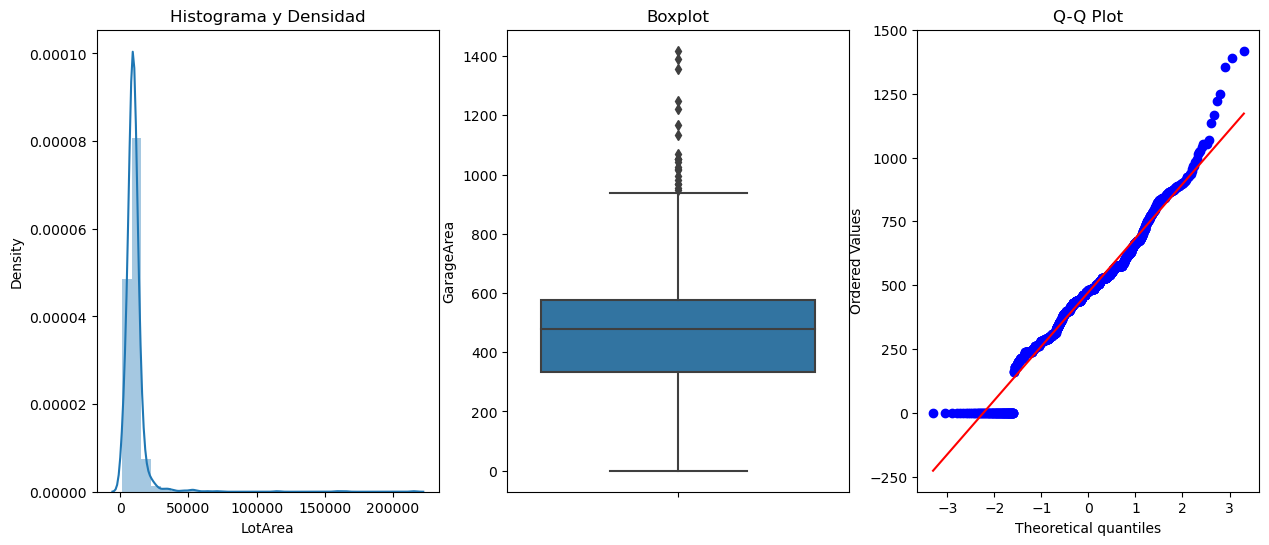

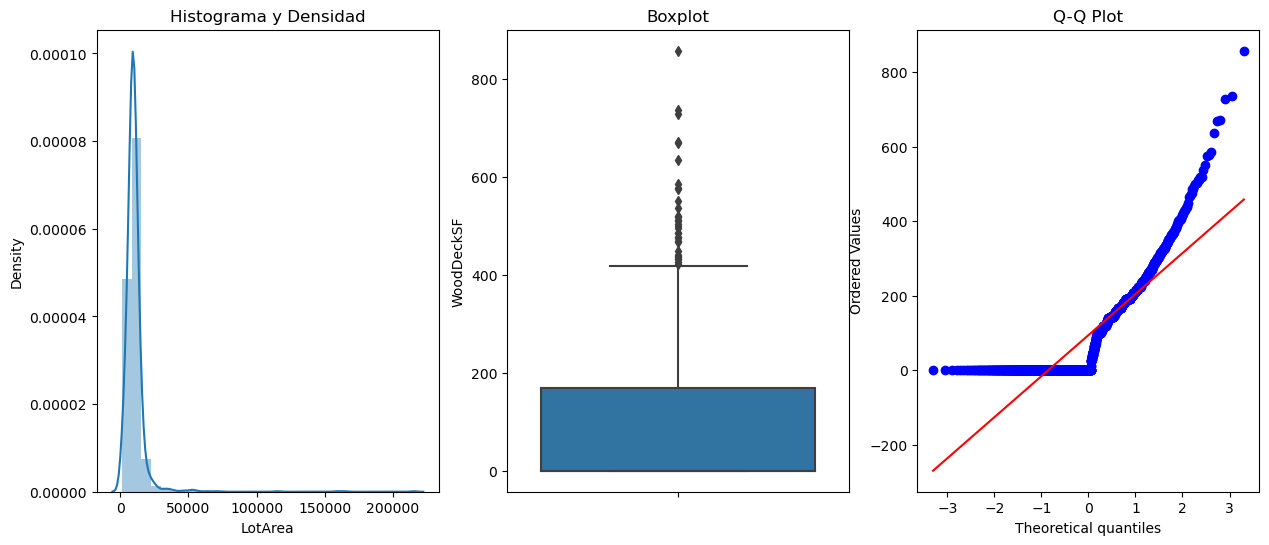

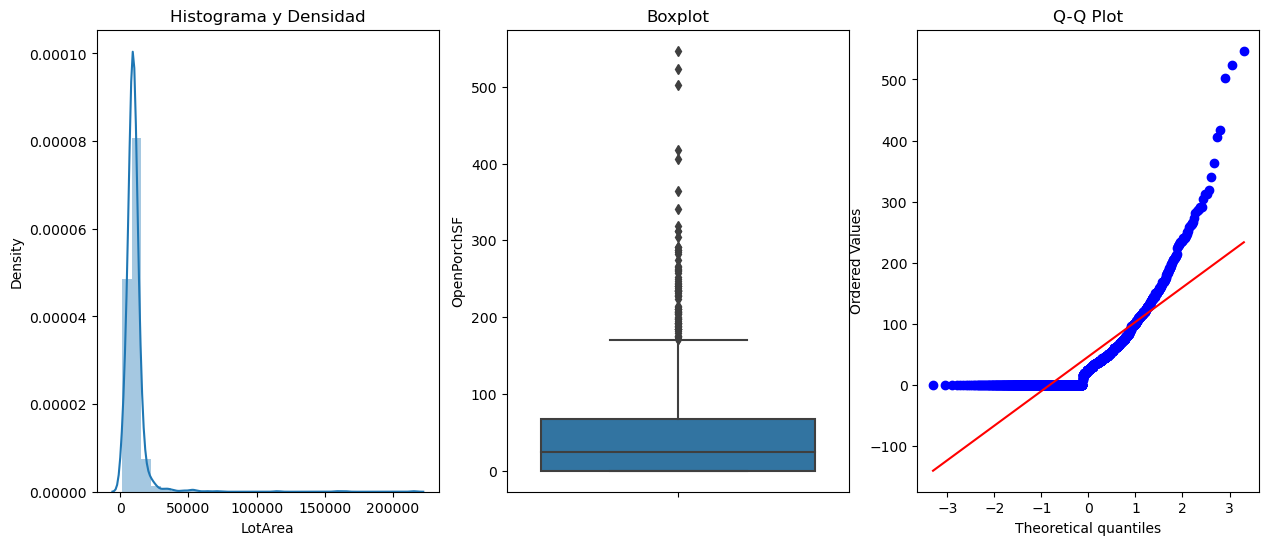

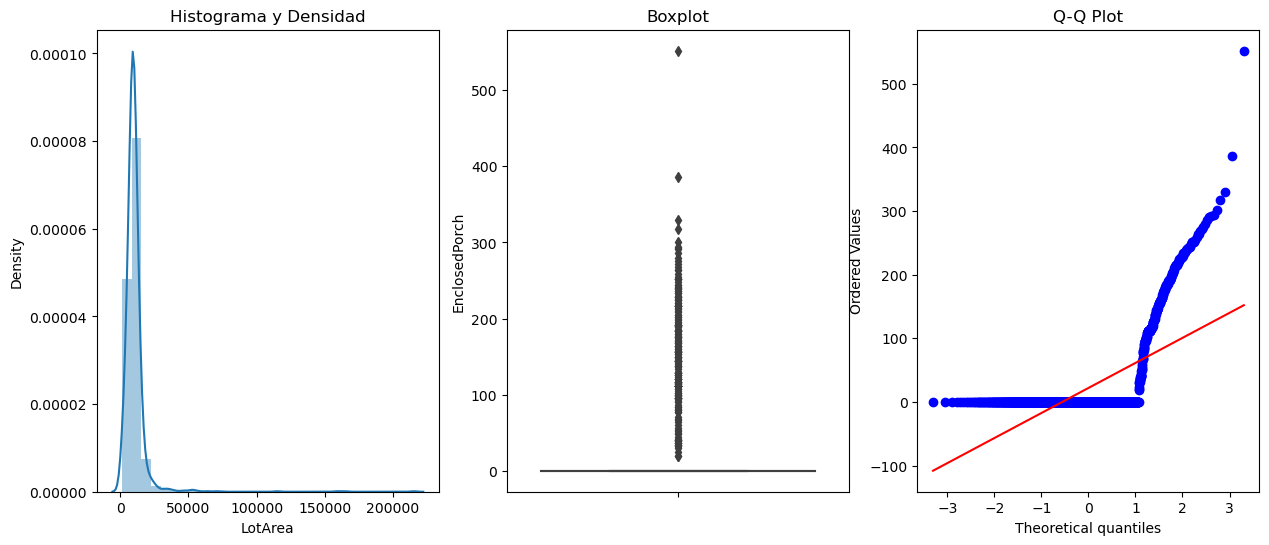

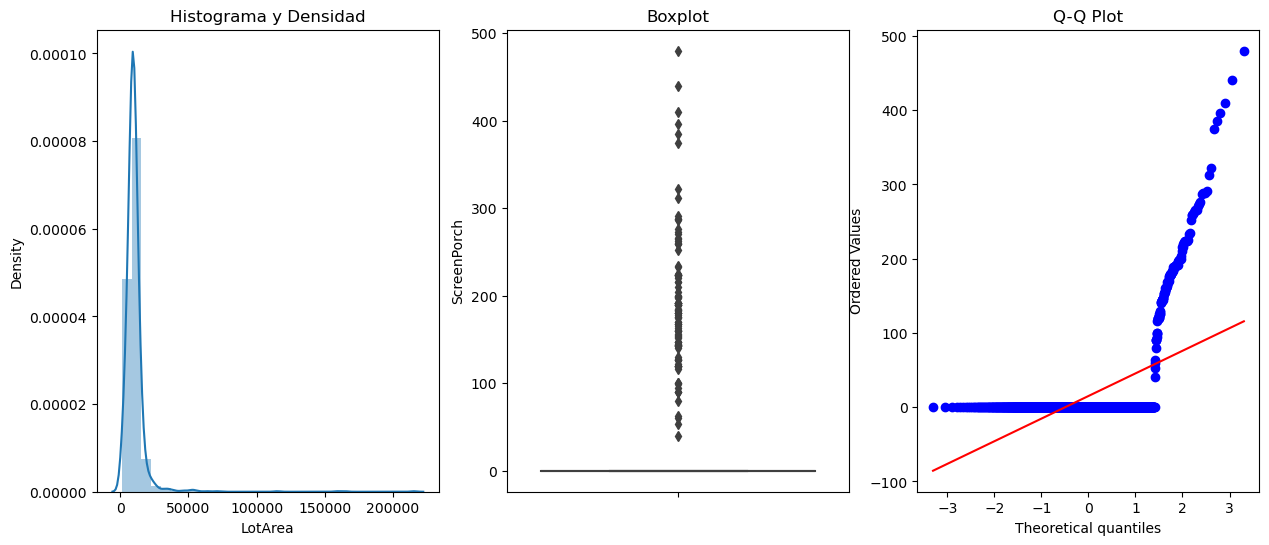

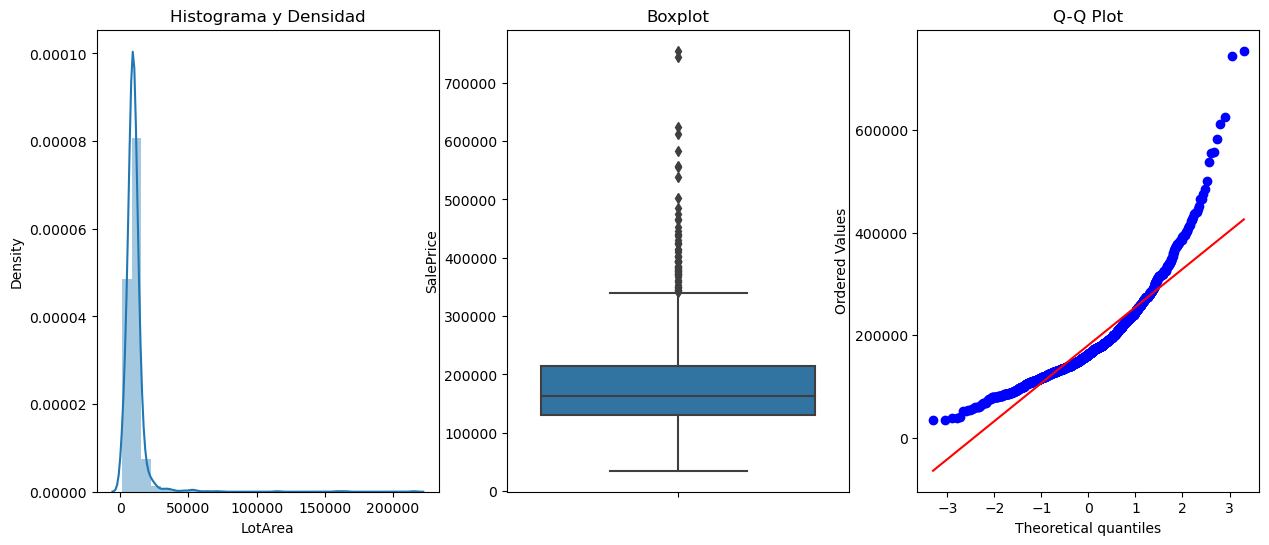

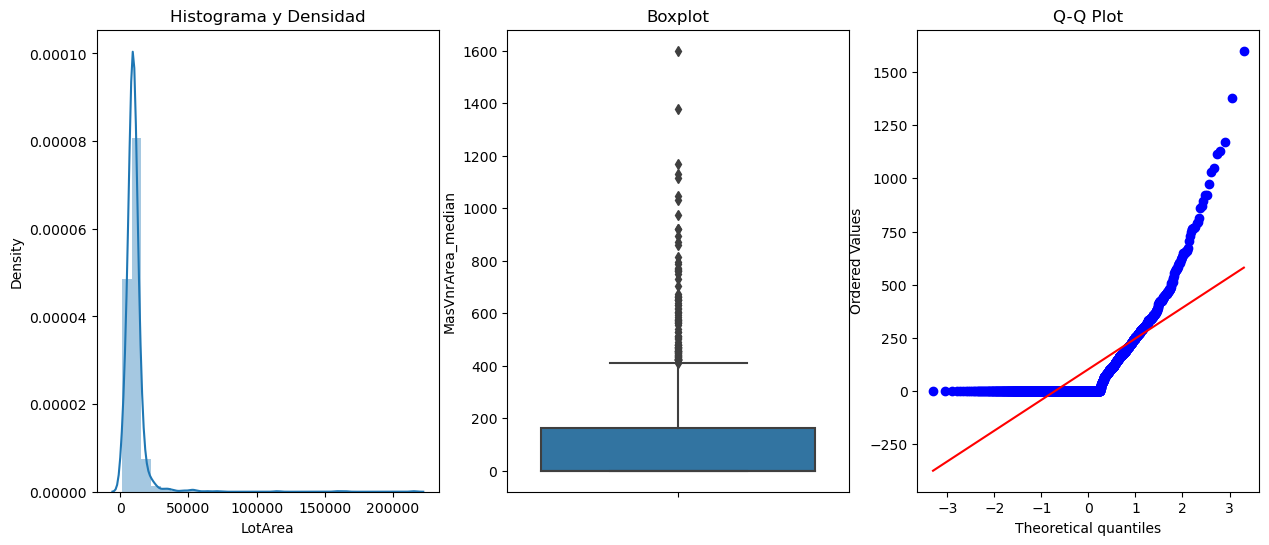

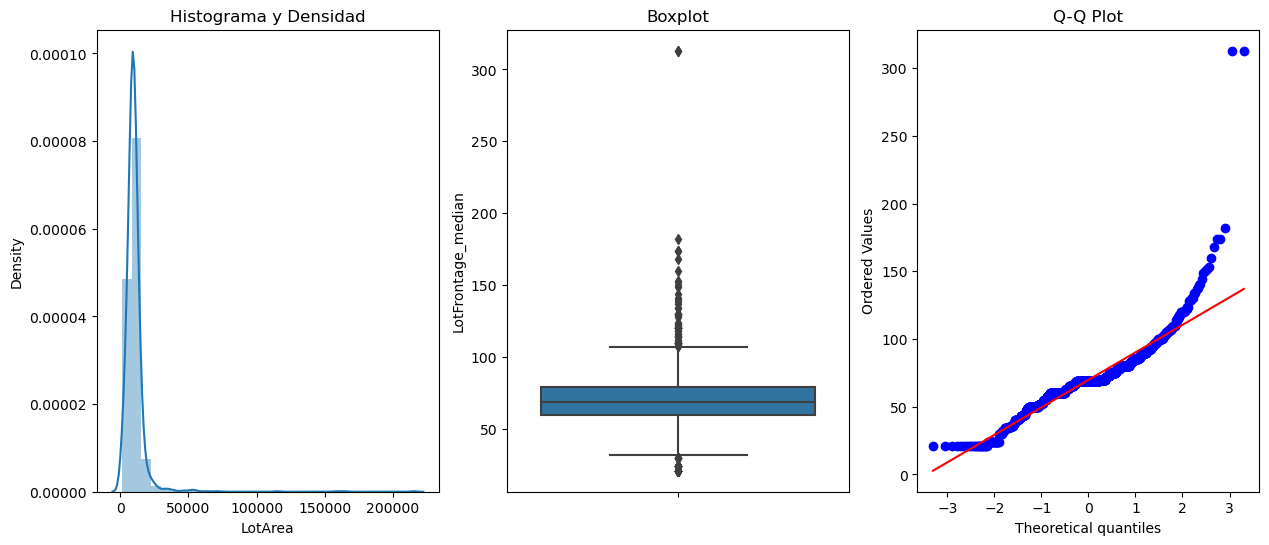

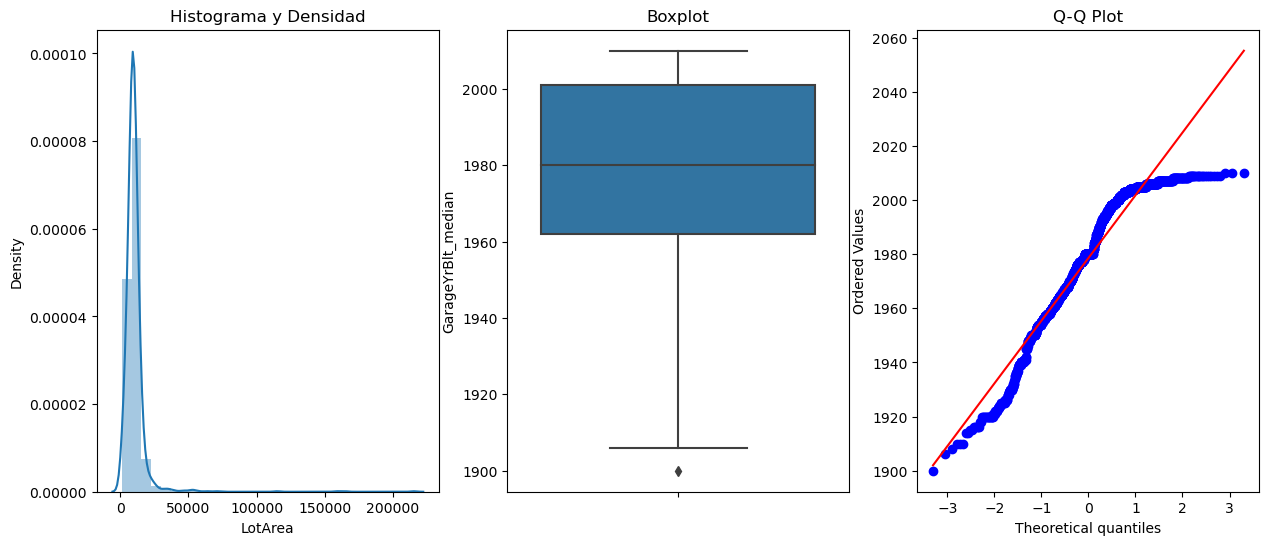

In [169]:
for col in Continuas:
    plotDistBoxQQ(dataHP,col)

In [170]:
dataset=dataHP
col='LotArea'
'''Calculador de limimite para OUTLIERS- OUTPUT: tupla con los limites superior e inferior'''
def detetectordeLimites(dataset,col):

    IQR=dataset [col].quantile(0.75)-dataset [col].quantile(0.25)
    LI=dataset[col].quantile(0.25)-(IQR*1.75)
    LS=dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

In [173]:
LI,LS=detetectordeLimites(dataset,'SalePrice')
LI,LS

(-17068.75, 361043.75)

### Capping

--------------------------------------LotArea----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


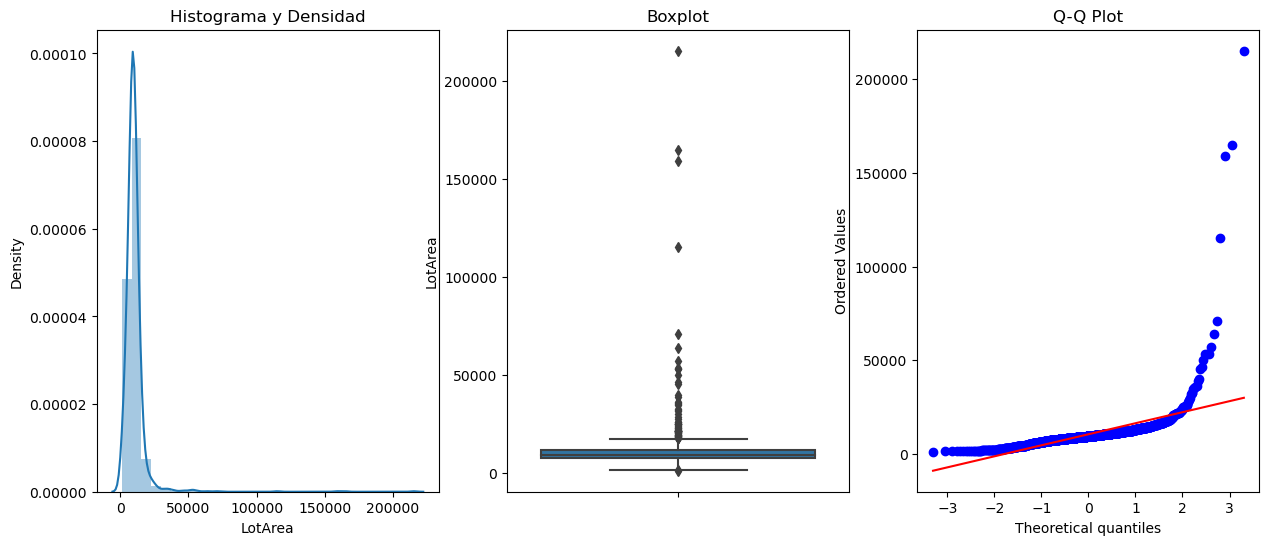

In [174]:
plotDistBoxQQ(dataHP,'LotArea')

In [175]:
LI,LS=detetectordeLimites(dataHP,'LotArea')
dataHP['LotArea']=np.where(dataHP['LotArea']>LS,LS,
                                np.where(dataHP['LotArea']<LI,LI,dataHP['LotArea']))

--------------------------------------LotArea----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


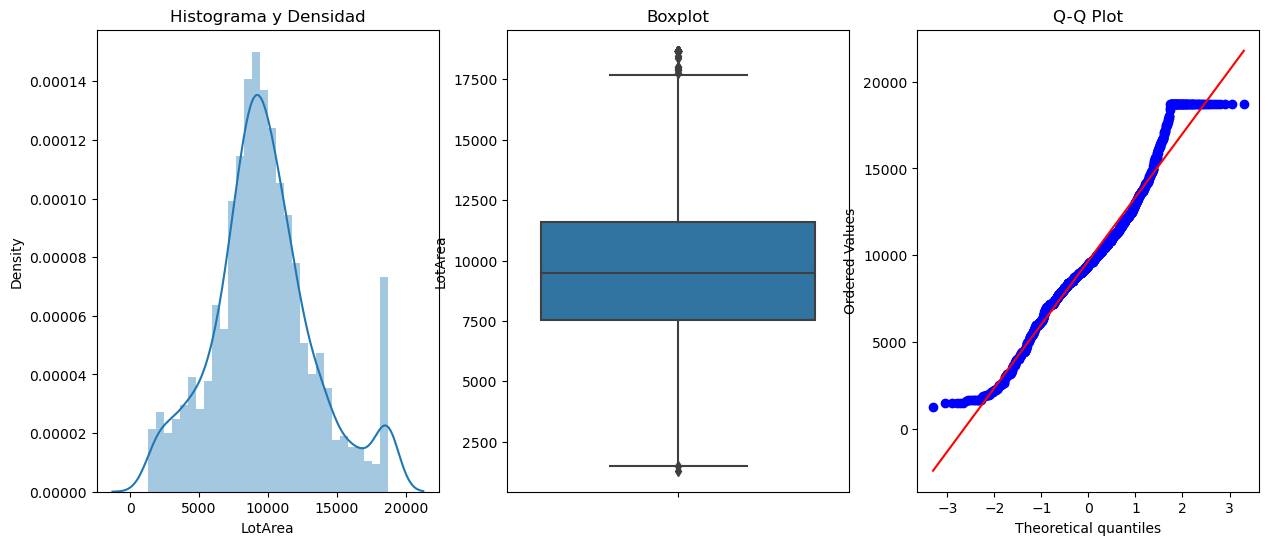

In [176]:
plotDistBoxQQ(dataHP,'LotArea')

In [183]:
for col in Continuas:
    LI,LS=detetectordeLimites(dataHP,col)
    dataHP[col]=np.where(dataHP[col]>LS,LS,
                                np.where(dataHP[col]<LI,LI,dataHP[col]))

In [184]:
detetectordeLimites(dataHP,col)

(1893.75, 2069.25)

--------------------------------------Id----------------------------
--------------------------------------LotFrontage----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------LotArea----------------------------
--------------------------------------YearBuilt----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------YearRemodAdd----------------------------
--------------------------------------MasVnrArea----------------------------
--------------------------------------BsmtFinSF1----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

--------------------------------------BsmtFinSF2----------------------------
--------------------------------------BsmtUnfSF----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------TotalBsmtSF----------------------------
--------------------------------------1stFlrSF----------------------------
--------------------------------------2ndFlrSF----------------------------
--------------------------------------GrLivArea----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

--------------------------------------GarageYrBlt----------------------------
--------------------------------------GarageArea----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------WoodDeckSF----------------------------
--------------------------------------OpenPorchSF----------------------------
--------------------------------------EnclosedPorch----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

--------------------------------------ScreenPorch----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


--------------------------------------SalePrice----------------------------
--------------------------------------MasVnrArea_median----------------------------
--------------------------------------LotFrontage_median----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\halej\AppData\Local\Temp\ipykernel_17728\551063573.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,6))
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

--------------------------------------GarageYrBlt_median----------------------------


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


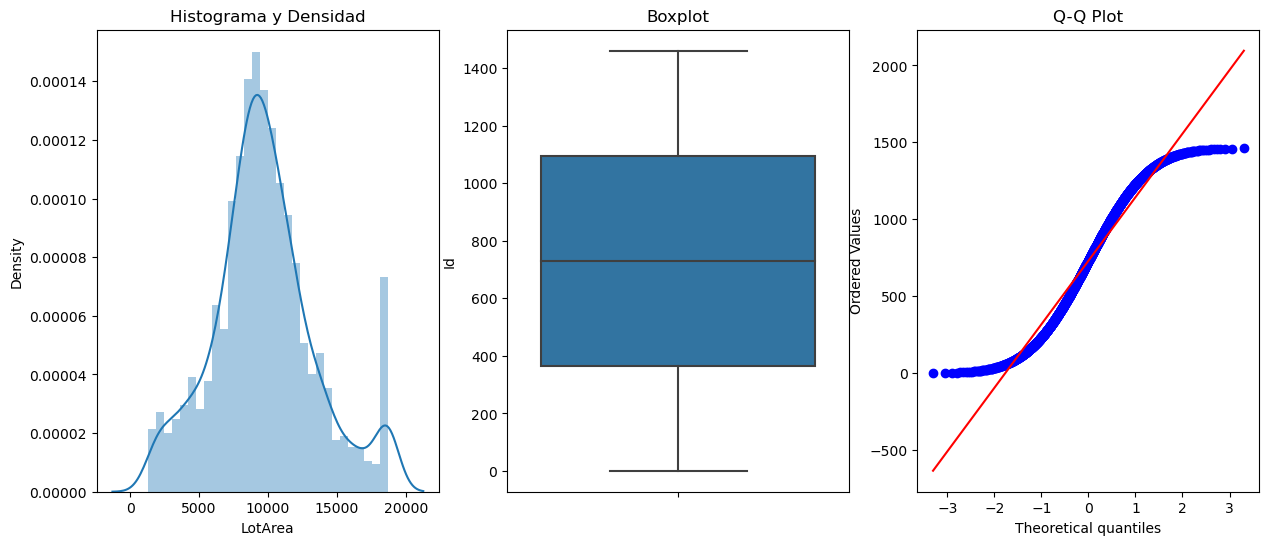

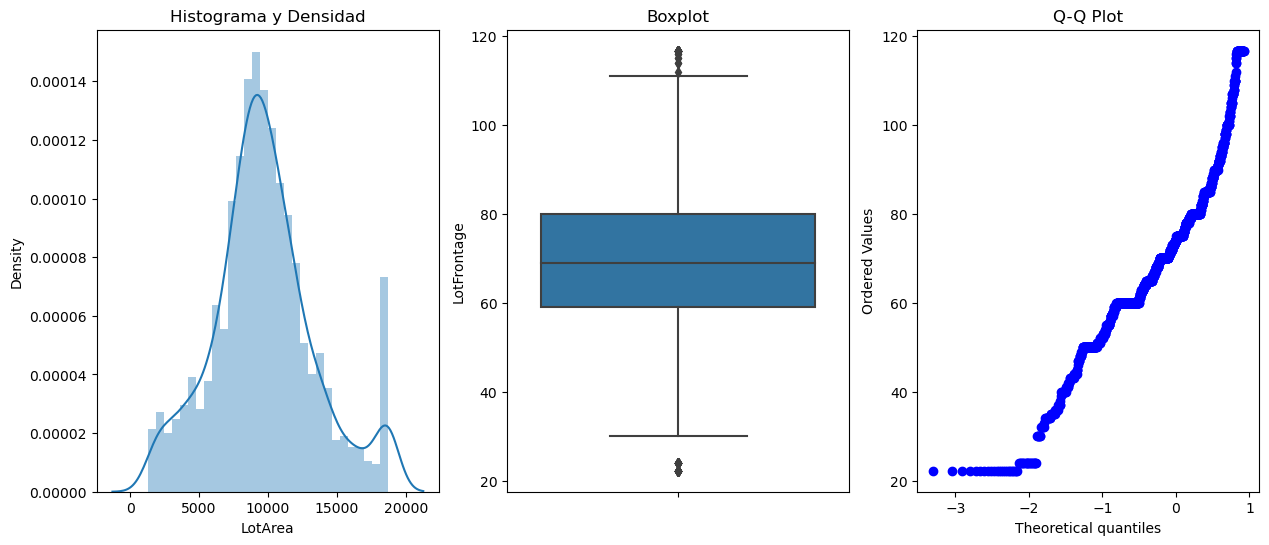

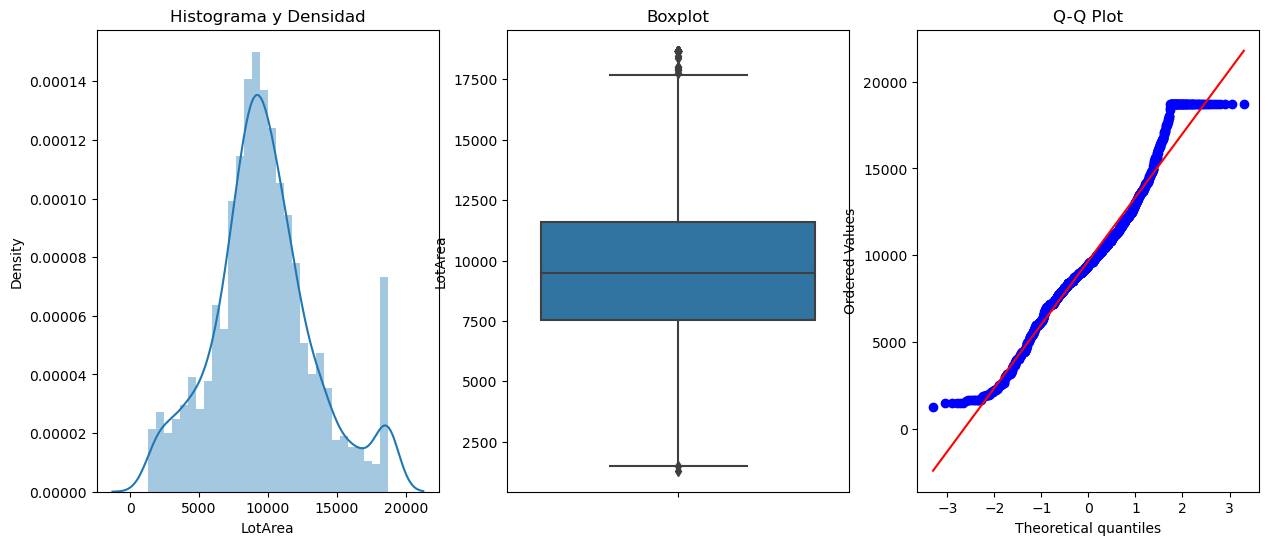

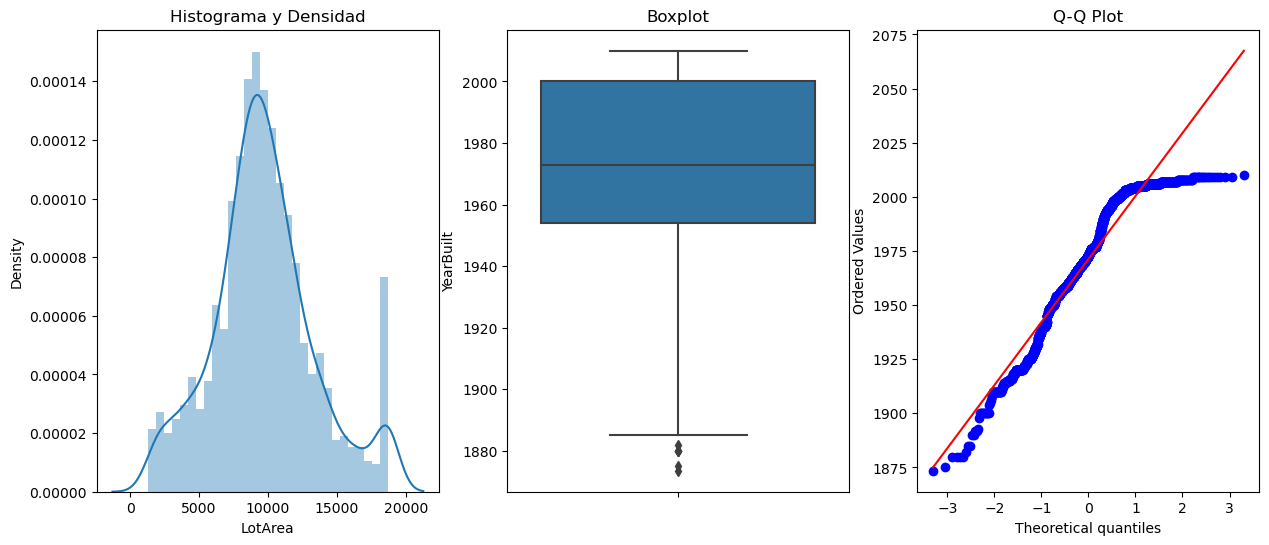

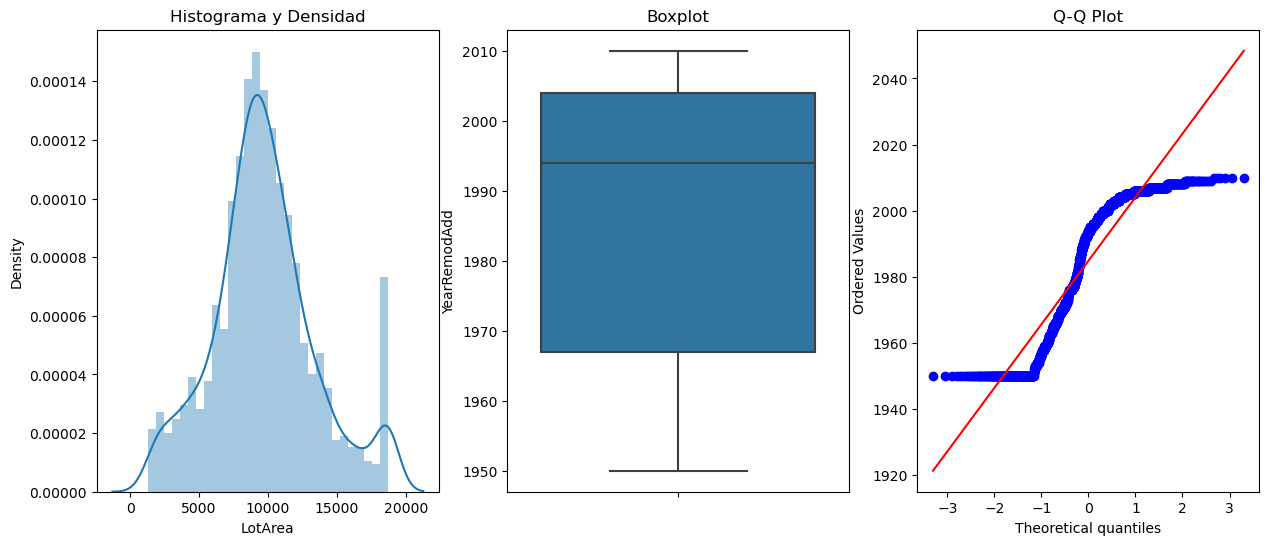

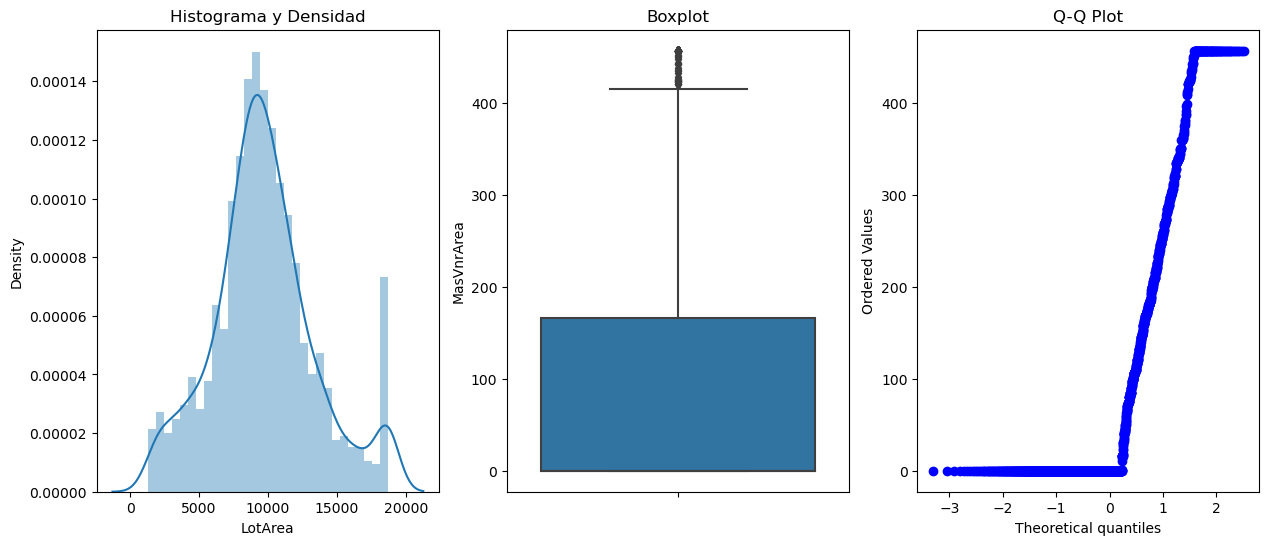

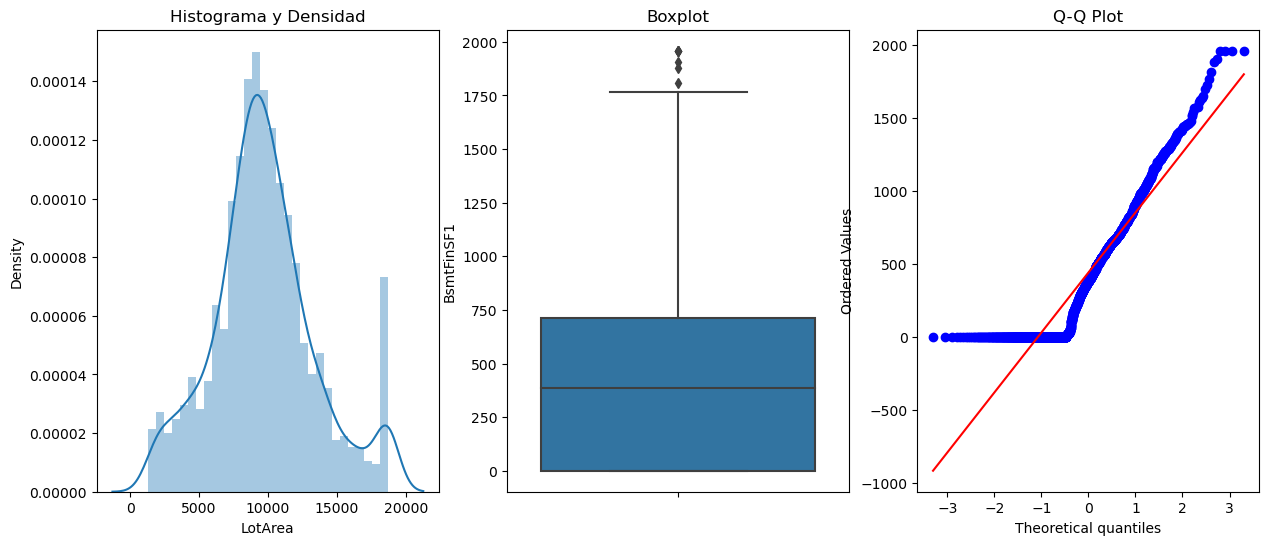

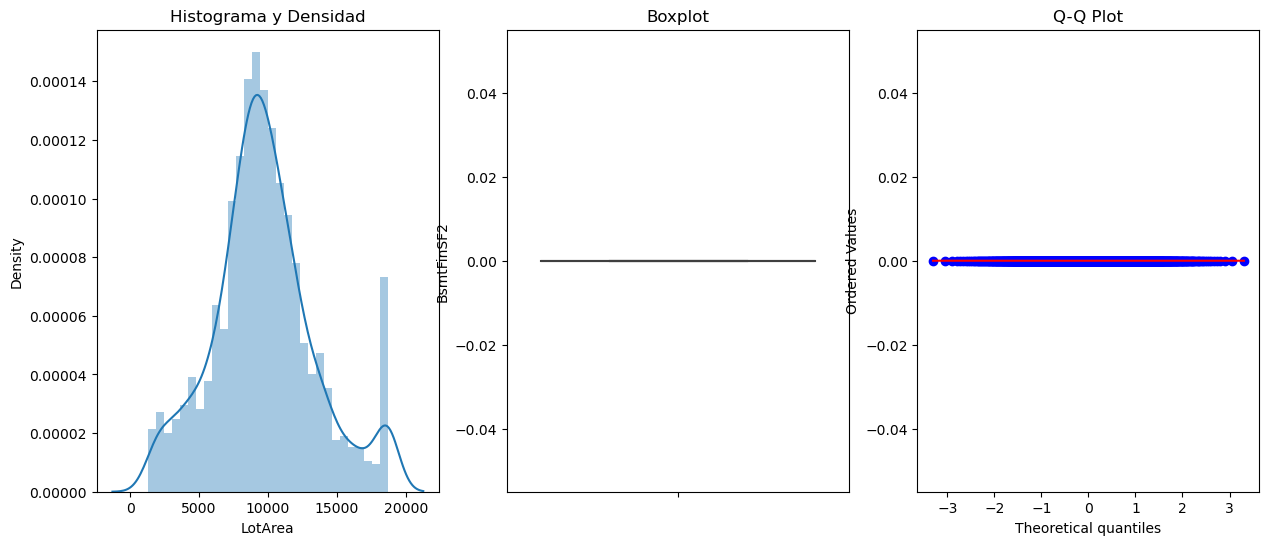

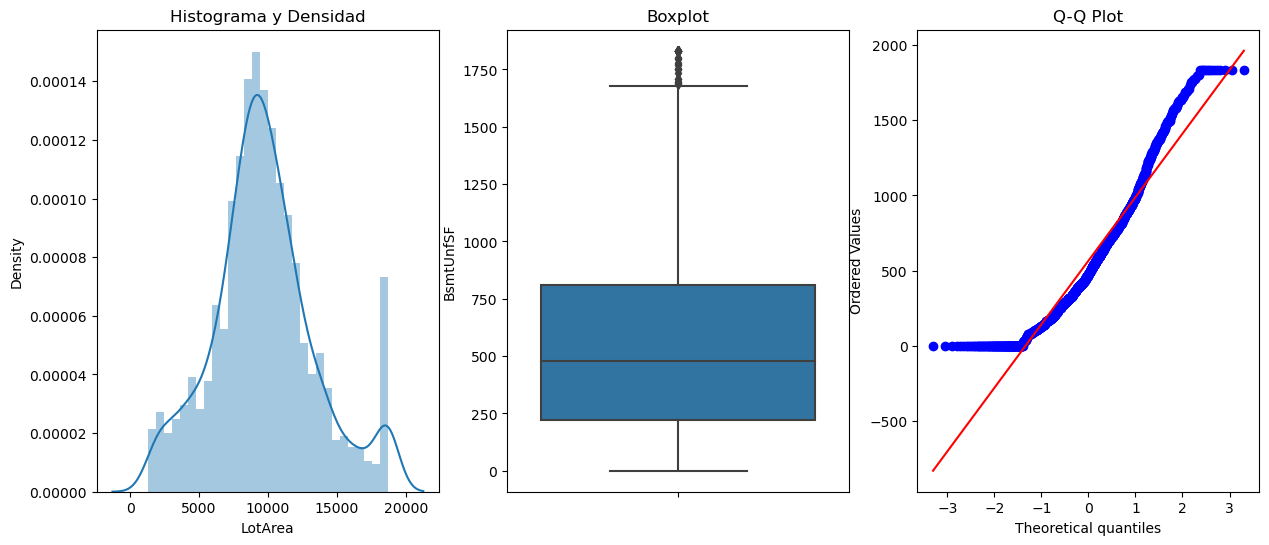

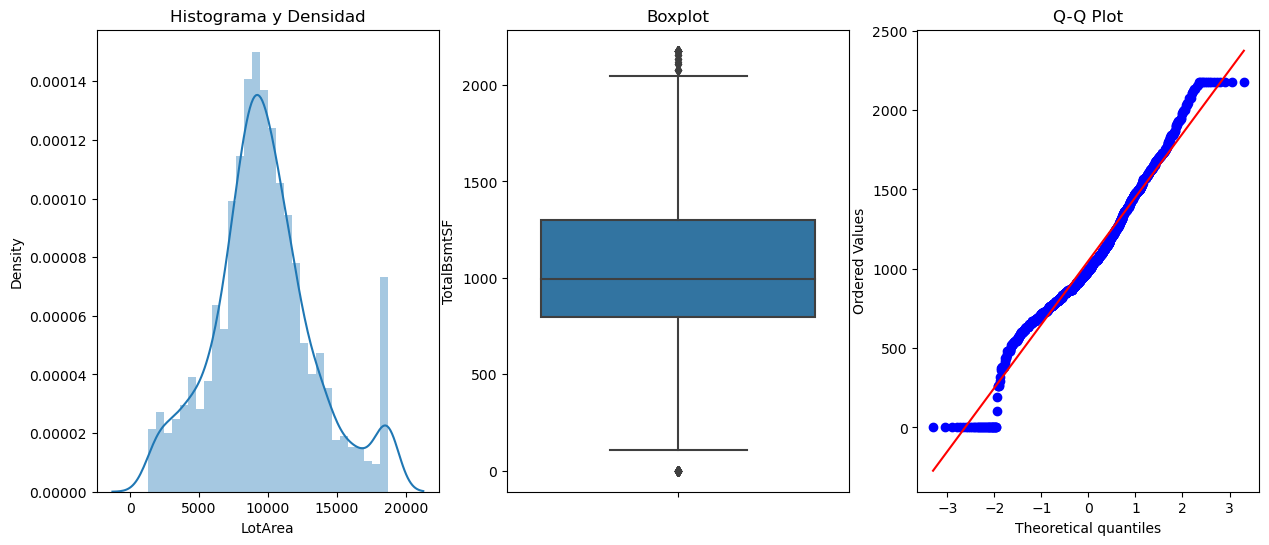

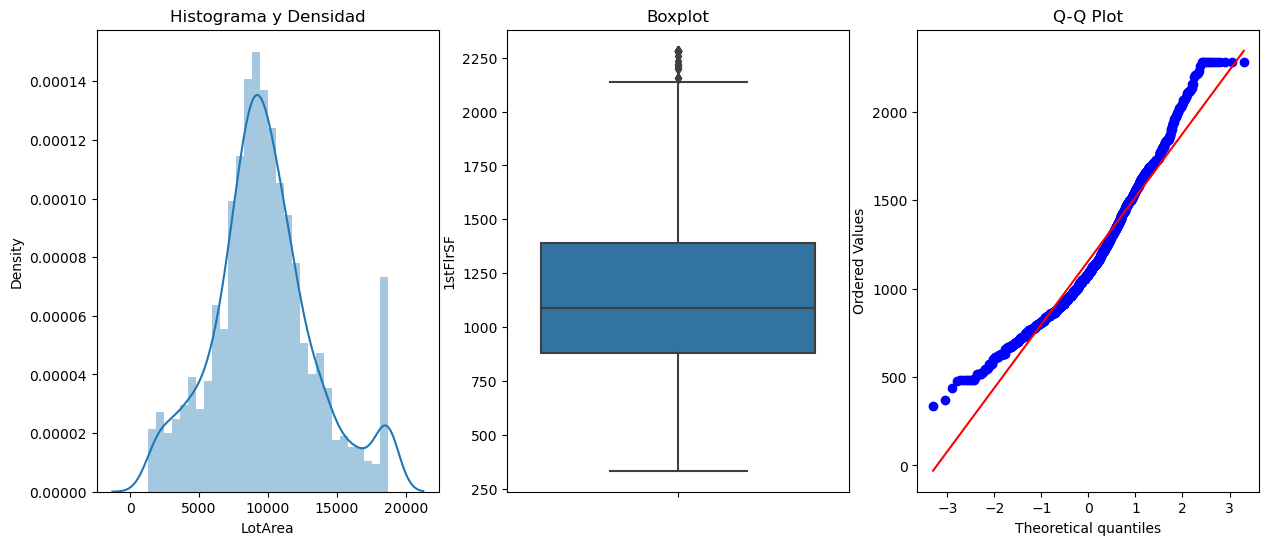

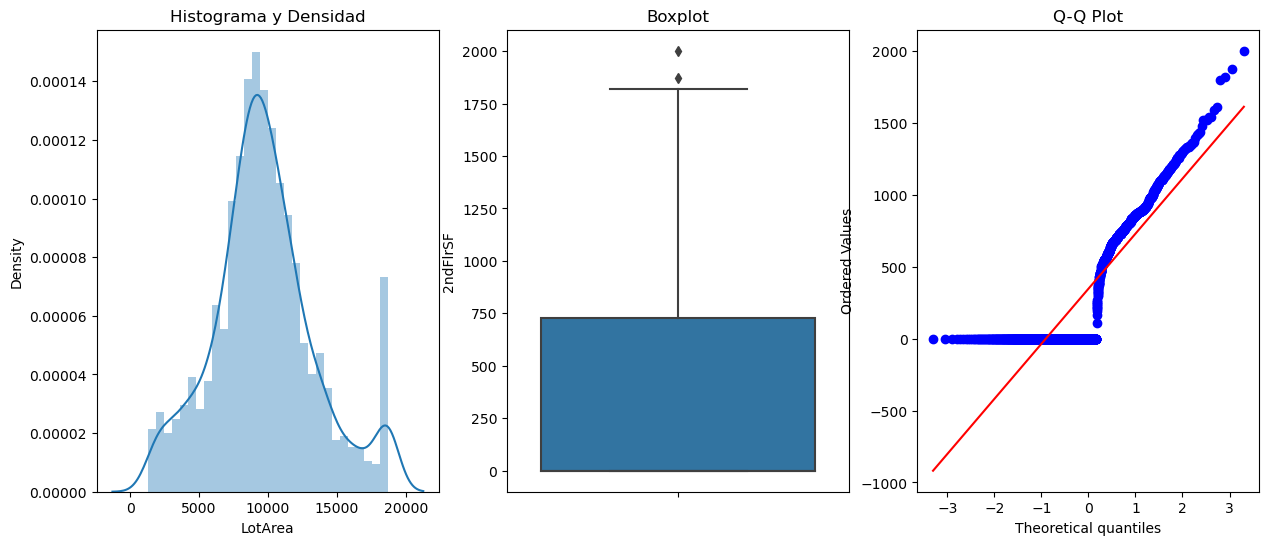

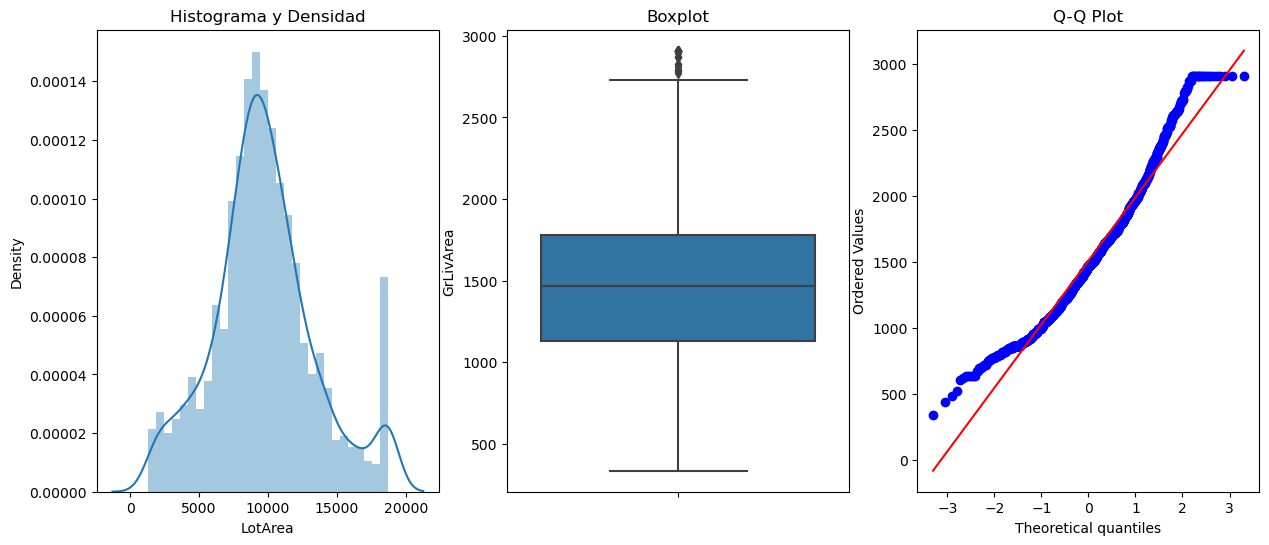

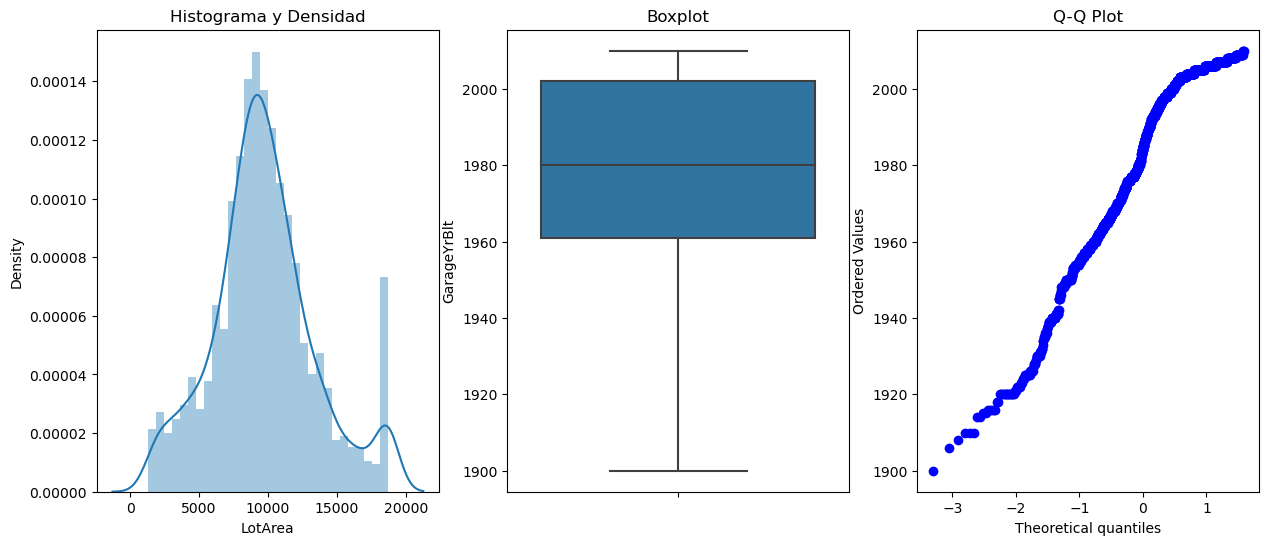

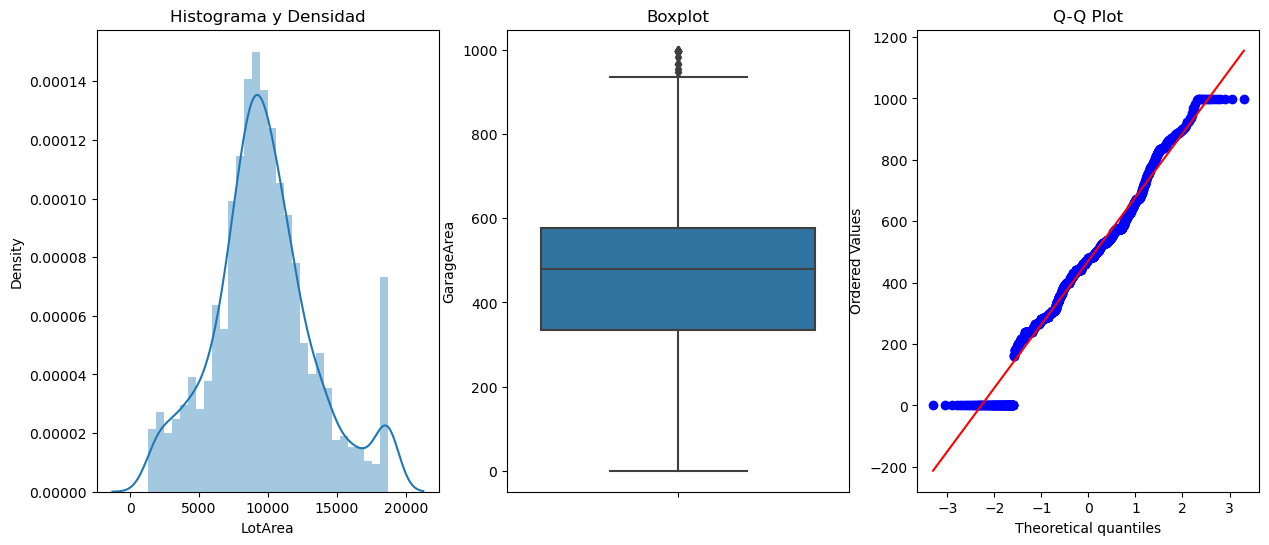

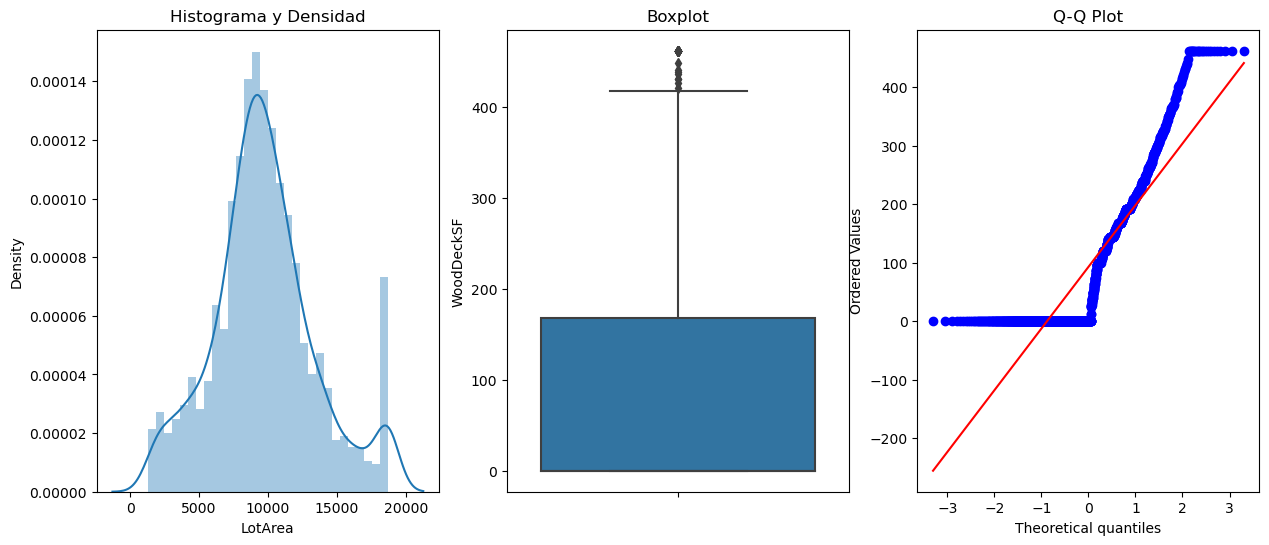

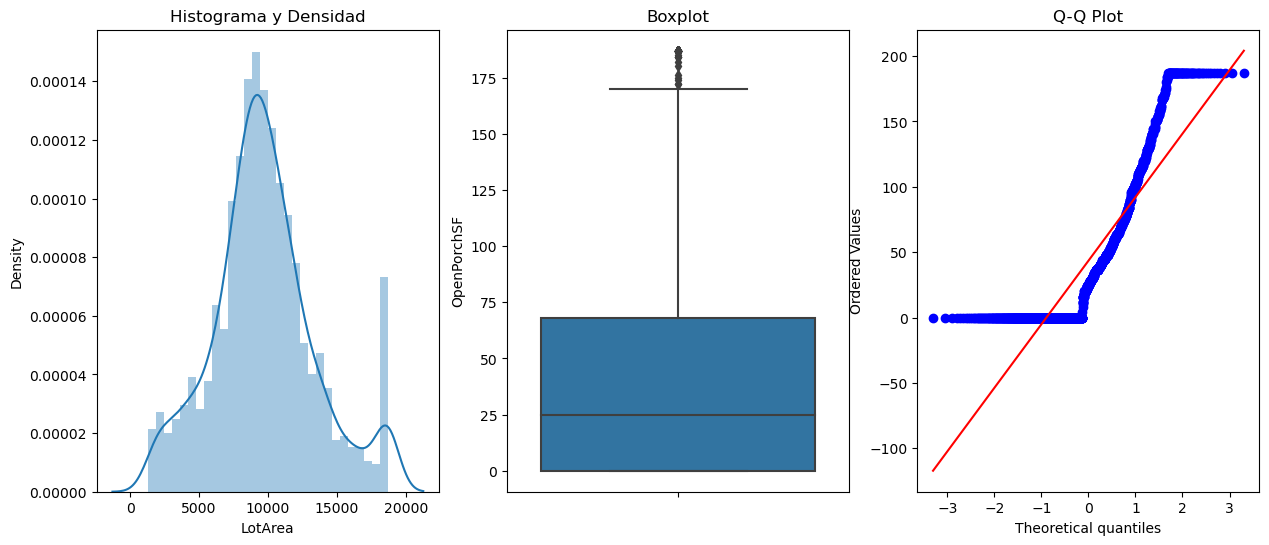

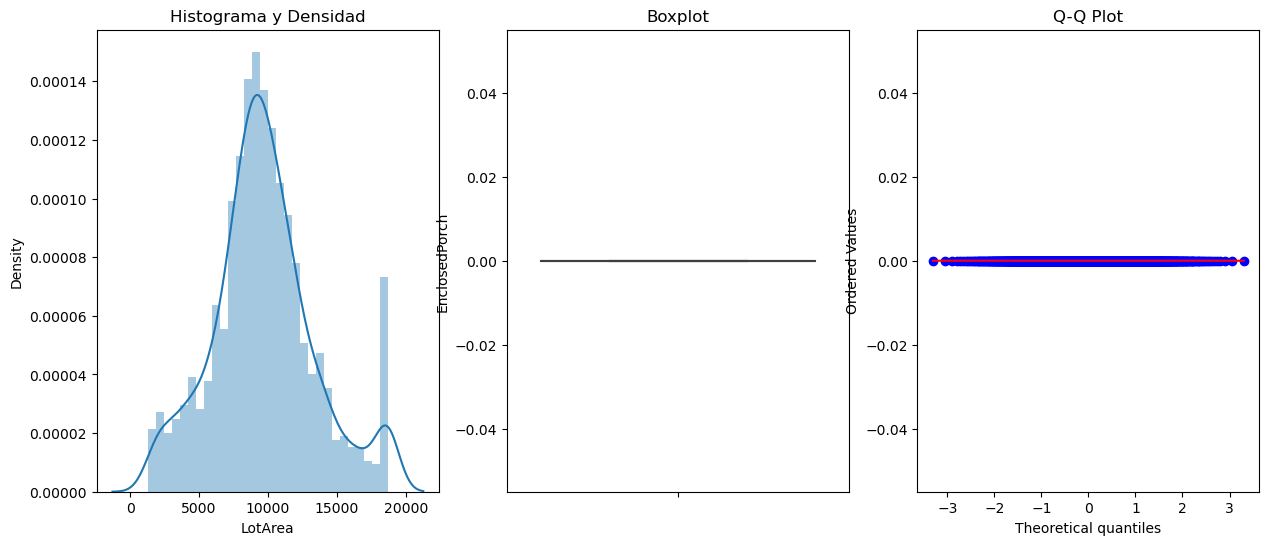

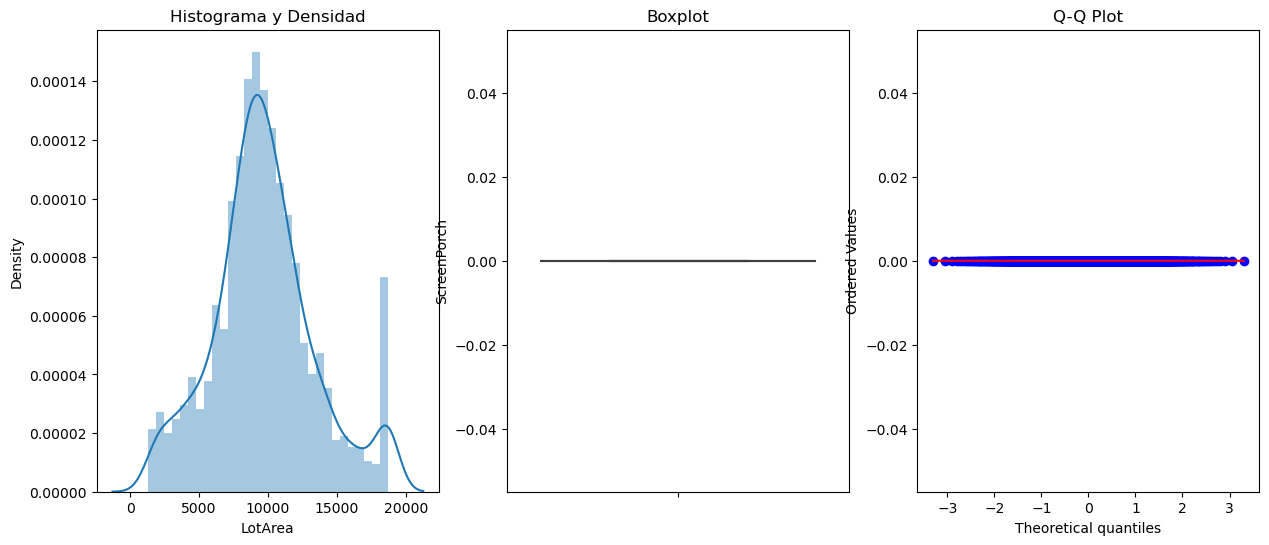

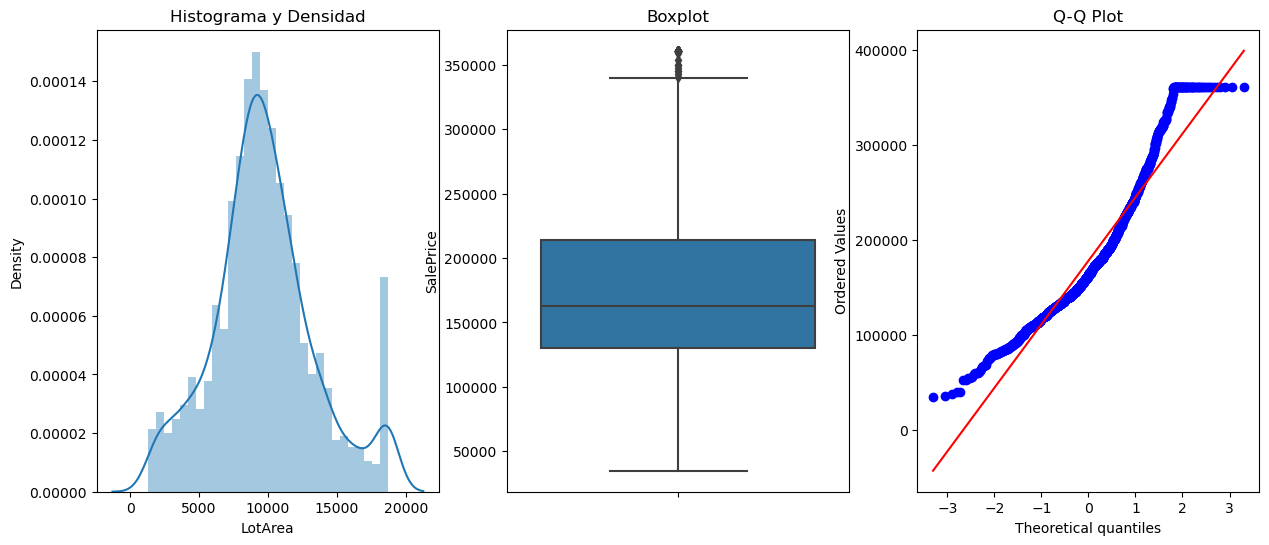

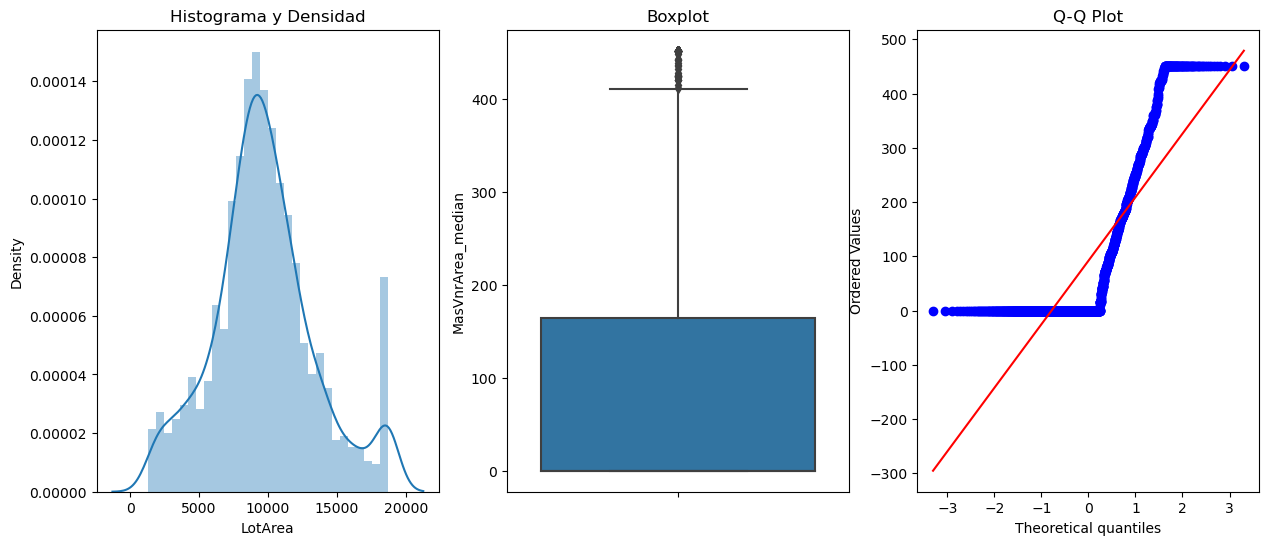

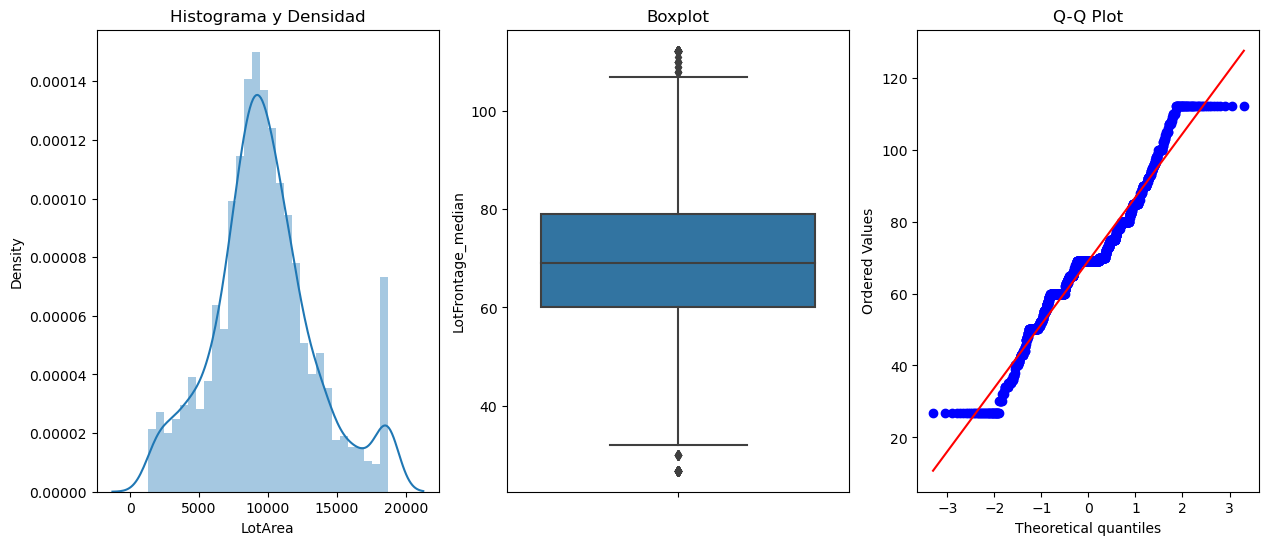

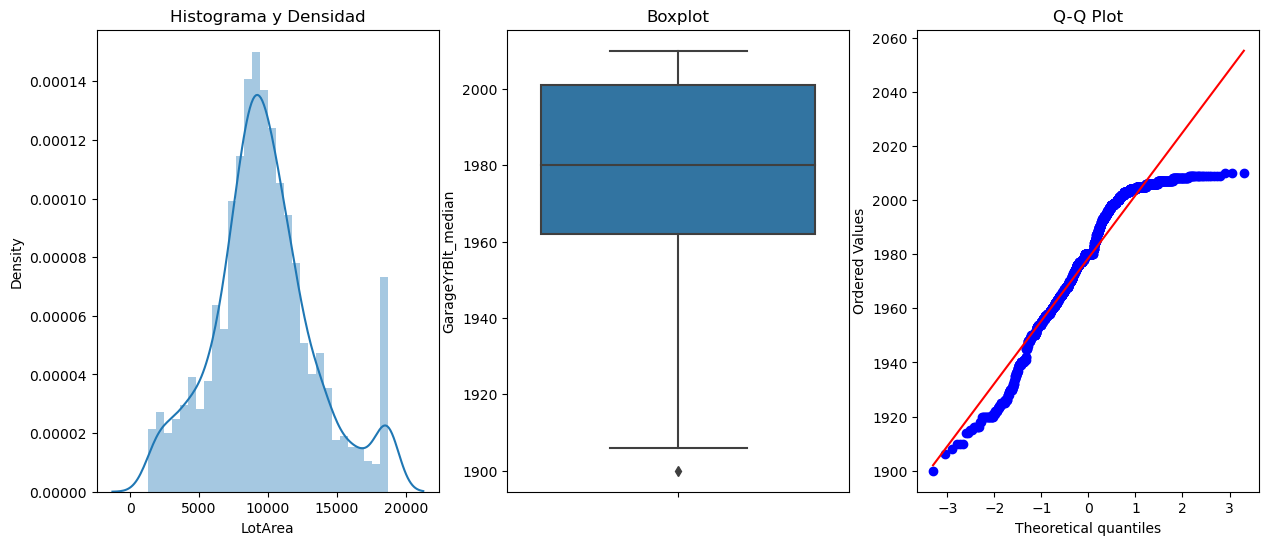

In [185]:
for col in Continuas:
    plotDistBoxQQ(dataHP,col)